# Proyek Analisis Data: Air Quality Dataset
- **Nama:** Ferri Krisdiantoro
- **Email:** ferryk935@gmail.com
- **ID Dicoding:** ferryk935

## Menentukan Pertanyaan Bisnis

1. Bagaimanakah tren dari kualitas udara (PM2.5 & PM10)?
2. Bagaimanakah Distribusi dari polutan utama yaitu PM2.5 dan PM10?
3. Bagaiamanakah Pengaruh dari  Suhu, Kelembapan dan Kondisi Cuaca terhadap dari kadar polutan utama (PM2.5 dan PM10)?
4. Bagaimanakah perbedaan kualitas udara dari ke 12 Station?
5. Apakah ada perbedaan kualitas udara pada hari kerja dan hari libur?
6. Bagaimanakan pola pencemaran udara dalam sehari?
7. Dimanakah area yang kualitas udaranya paling buruk?
8. Kapan waktu terbaik dalam melakukan aktifitas diluar rumah untuk mendapatkan udara yang bersih?
9. Apakah ada sebuah hari dalam seminggu yang udaranya paling kotor?

## Import Semua Packages/Library yang Digunakan

1. pandas untuk memproses, manipulasi dan analisis pada data dari dataset air quality
2. glob untuk mengambil semua daftar file csv pada folder data yang berjumlah 12
3. seaborn dan matplotlib untuk visualisasi data supaya lebih menarik dan mudah dimengerti
4. numpy untuk manipulasi angka

In [1]:
import pandas as pd
import glob
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Data Wrangling

### Gathering Data

Load semua file csv yang ada pada dataset.

In [2]:
dataPath = "/mnt/d/Artificial Intellegence/Machine Learning/CodingCamp/data/*.csv"

Tampung semua file csv kedalam sebuah variabel menggunakan *glob*.

In [3]:
listFile = glob.glob(dataPath)
listFile

['/mnt/d/Artificial Intellegence/Machine Learning/CodingCamp/data/PRSA_Data_Aotizhongxin_20130301-20170228.csv',
 '/mnt/d/Artificial Intellegence/Machine Learning/CodingCamp/data/PRSA_Data_Changping_20130301-20170228.csv',
 '/mnt/d/Artificial Intellegence/Machine Learning/CodingCamp/data/PRSA_Data_Dingling_20130301-20170228.csv',
 '/mnt/d/Artificial Intellegence/Machine Learning/CodingCamp/data/PRSA_Data_Dongsi_20130301-20170228.csv',
 '/mnt/d/Artificial Intellegence/Machine Learning/CodingCamp/data/PRSA_Data_Guanyuan_20130301-20170228.csv',
 '/mnt/d/Artificial Intellegence/Machine Learning/CodingCamp/data/PRSA_Data_Gucheng_20130301-20170228.csv',
 '/mnt/d/Artificial Intellegence/Machine Learning/CodingCamp/data/PRSA_Data_Huairou_20130301-20170228.csv',
 '/mnt/d/Artificial Intellegence/Machine Learning/CodingCamp/data/PRSA_Data_Nongzhanguan_20130301-20170228.csv',
 '/mnt/d/Artificial Intellegence/Machine Learning/CodingCamp/data/PRSA_Data_Shunyi_20130301-20170228.csv',
 '/mnt/d/Artific

Proses semua file csv yang ada pada variabel *listFile* menggunakan *pandas.read_csv* dan perulangan

In [4]:
listData = [pd.read_csv(file) for file in listFile]
listData

[          No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  \
 0          1  2013      3    1     0    4.0   4.0   4.0   7.0  300.0  77.0   
 1          2  2013      3    1     1    8.0   8.0   4.0   7.0  300.0  77.0   
 2          3  2013      3    1     2    7.0   7.0   5.0  10.0  300.0  73.0   
 3          4  2013      3    1     3    6.0   6.0  11.0  11.0  300.0  72.0   
 4          5  2013      3    1     4    3.0   3.0  12.0  12.0  300.0  72.0   
 ...      ...   ...    ...  ...   ...    ...   ...   ...   ...    ...   ...   
 35059  35060  2017      2   28    19   12.0  29.0   5.0  35.0  400.0  95.0   
 35060  35061  2017      2   28    20   13.0  37.0   7.0  45.0  500.0  81.0   
 35061  35062  2017      2   28    21   16.0  37.0  10.0  66.0  700.0  58.0   
 35062  35063  2017      2   28    22   21.0  44.0  12.0  87.0  700.0  35.0   
 35063  35064  2017      2   28    23   19.0  31.0  10.0  79.0  600.0  42.0   
 
        TEMP    PRES  DEWP  RAIN   wd  WSPM       

Gabungkan semua csv menggunanakan *concat*, *concat* sendiri dipilih karena struktur dari 12 dataset sama, yang membedakan hanyalah isinya. Kemudian parameter *ignore_index* sendiri digunakan untuk **menghapus index lama dan membuat index baru** dari dataset tersebut. Tanpa parameter *ignore_index*, index pada dataset akan menjadi [1,2,3,1,2,3], Tapi bila menggunakan *ignore_index = True*, maka list index awal akan dihapus dan membuat index baru [0,1,2,3,4,5].

In [5]:
dfMerge = pd.concat(listData, ignore_index=True)
dfMerge

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420763,35060,2017,2,28,19,11.0,32.0,3.0,24.0,400.0,72.0,12.5,1013.5,-16.2,0.0,NW,2.4,Wanshouxigong
420764,35061,2017,2,28,20,13.0,32.0,3.0,41.0,500.0,50.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Wanshouxigong
420765,35062,2017,2,28,21,14.0,28.0,4.0,38.0,500.0,54.0,10.8,1014.2,-13.3,0.0,NW,1.1,Wanshouxigong
420766,35063,2017,2,28,22,12.0,23.0,4.0,30.0,400.0,59.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Wanshouxigong


Setelah dataset berhasil digabungkan, langkah selanjutnya ialah mengecek informasi dari dataset menggunakan *.info()* untuk menampilkan **jumlah baris dan kolom, nama dan tipe data dari setiap kolom, jumlah nilai yang non-null perkolomnya dan ukuran pemakaian memori**. Dari hasil menunjukan pada kolom pm2.5 sampai WSPM jumlah datanya berbeda daripada nilai sebelumnya yang mengindikasikan adanya missing value.

In [6]:
dfMerge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       420768 non-null  int64  
 1   year     420768 non-null  int64  
 2   month    420768 non-null  int64  
 3   day      420768 non-null  int64  
 4   hour     420768 non-null  int64  
 5   PM2.5    412029 non-null  float64
 6   PM10     414319 non-null  float64
 7   SO2      411747 non-null  float64
 8   NO2      408652 non-null  float64
 9   CO       400067 non-null  float64
 10  O3       407491 non-null  float64
 11  TEMP     420370 non-null  float64
 12  PRES     420375 non-null  float64
 13  DEWP     420365 non-null  float64
 14  RAIN     420378 non-null  float64
 15  wd       418946 non-null  object 
 16  WSPM     420450 non-null  float64
 17  station  420768 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 57.8+ MB


Gunakan method *.head(value)* dalam *pandas* untuk menampilkan atau mengetahui isi dari **index pertama/index awal/index kepala** dalam dataset. Contohnya *.head(10)* untuk *melihat isi 10 index awal* dari dataset gabungan.

In [7]:
dfMerge.head(10)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin
5,6,2013,3,1,5,5.0,5.0,18.0,18.0,400.0,66.0,-2.2,1025.6,-19.6,0.0,N,3.7,Aotizhongxin
6,7,2013,3,1,6,3.0,3.0,18.0,32.0,500.0,50.0,-2.6,1026.5,-19.1,0.0,NNE,2.5,Aotizhongxin
7,8,2013,3,1,7,3.0,6.0,19.0,41.0,500.0,43.0,-1.6,1027.4,-19.1,0.0,NNW,3.8,Aotizhongxin
8,9,2013,3,1,8,3.0,6.0,16.0,43.0,500.0,45.0,0.1,1028.3,-19.2,0.0,NNW,4.1,Aotizhongxin
9,10,2013,3,1,9,3.0,8.0,12.0,28.0,400.0,59.0,1.2,1028.5,-19.3,0.0,N,2.6,Aotizhongxin


Kebalikan dari method *.head(value)* yang digunakan untuk melihat isi kepala dataset, *.tail(value)* untuk melihat **data terakhir/ekor** data dari sebuah dataset. Dari hasil ini, dapat disimpulkan bahwa dataset berhasil digabung tanpa sebuah kendala.

In [8]:
dfMerge.tail(10)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
420758,35055,2017,2,28,14,3.0,6.0,NaN,5.0,NaN,82.0,14.6,1013.3,-15.6,0.0,N,3.6,Wanshouxigong
420759,35056,2017,2,28,15,11.0,21.0,2.0,5.0,200.0,NaN,15.4,1013.0,-15.0,0.0,NNW,3.3,Wanshouxigong
420760,35057,2017,2,28,16,6.0,20.0,3.0,NaN,200.0,80.0,14.9,1012.6,-15.4,0.0,NW,2.1,Wanshouxigong
420761,35058,2017,2,28,17,11.0,23.0,3.0,12.0,300.0,87.0,14.2,1012.5,-14.9,0.0,NW,3.1,Wanshouxigong
420762,35059,2017,2,28,18,11.0,30.0,2.0,16.0,300.0,82.0,13.4,1013.0,-15.5,0.0,WNW,1.4,Wanshouxigong
420763,35060,2017,2,28,19,11.0,32.0,3.0,24.0,400.0,72.0,12.5,1013.5,-16.2,0.0,NW,2.4,Wanshouxigong
420764,35061,2017,2,28,20,13.0,32.0,3.0,41.0,500.0,50.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Wanshouxigong
420765,35062,2017,2,28,21,14.0,28.0,4.0,38.0,500.0,54.0,10.8,1014.2,-13.3,0.0,NW,1.1,Wanshouxigong
420766,35063,2017,2,28,22,12.0,23.0,4.0,30.0,400.0,59.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Wanshouxigong
420767,35064,2017,2,28,23,13.0,19.0,4.0,38.0,600.0,49.0,8.6,1014.1,-15.9,0.0,NNE,1.3,Wanshouxigong


**Insight:**
- **Dataset berjumlah 12**, dimana setiap dataset mewakili sebuah wilayah yang ada di China.
- Meskipun dataset berjumlah 12, tapi **struktur kolom yang ada pada dataset sama** yang mana bisa digabungkan menggunakan method *.concat* dalam *pandas*.
- Dataset memiliki **16 kolom numerical** (no, year, month, day, hour, PM2.5, PM10, SO2, NO2, O3, TEMP, PRES, DEWP, RAIN dan WSPM) dan **2 kolom categorycal** (wd dan station).
- Tipe data dalam dataset cukup beragam, *tipe data objek* untuk **kolom kategorikal**, *integer dan float* untuk **kolom numerikal**.
- Dataset gabungan memiliki **total 420768 baris**, kolom tetap sama yaitu **18 kolom**.

Penjelasan mengenai kolom yang ada dalam dataset untuk mengenal dan mengetahui struktur dataset lebih jauh.
| Kolom   | Penjelasan                                                                                     |
|---------|------------------------------------------------------------------------------------------------|
| No      | **Nomor urutan/ID** dari setiap *observasi/data* dalam dataset.                                        |
| year    | **Tahun pengambilan dari data** tersebut (2013-2017).                                                       |
| month   | **Bulan pengambilan dari data** tersebut ( 1-12).                                                             |
| day     | **Tangal atau hari pengambilan dari data** tersebut ( 1-31).                                                              |
| hour    | **Jam pengambilan dari data tersebut** (Menggunakan format 24 jam, 0-23).                                                      |
| PM2.5   | **Konsentrasi partikel udara** dengan *diameter ≤2.5 µg/m³* (miu gram per meter kubik) dari data tersebut yang menjadi sebuah **indikator utama kualitas udara** dalam dataset.           |
| PM10    | **Konsentrasi partikel udara** dengan *diameter ≤10 µg/m³* (miu gram per meter kubik) dari data tersebut yang mencerminkan **jumlah partikel yang lebih besar**.|
| SO2     | **Konsentrasi *sulfur dioksida (SO₂)*** dari data yang dihasilkan dari **pembakaran bahan bakar fosil dan industri**.     |
| NO2     | **Konsentrasi nitrogen *dioksida (NO₂)*** dari data yang biasanya berasal dari **emisi kendaraan dan proses industri**.   |
| CO      | **Konsentrasi *karbon monoksida (CO)* dari data** yang merupakan sebuah **gas beracun dari pembakaran**                   |
| O3      | **Konsentrasi *ozon (O₃)* di permukaan tanah** dari data yang dapat **berdampak negatif pada kesehatan pernapasan**.  |
| TEMP    |**Suhu udara dalam *Celcius (°C)*** dari data yang tercatat pada saat pengambilan data.                                      |
| PRES    | **Tekanan udara dalam *hectopascal (hPa)*** dari data yang mencerminkan kondisi atmosfer.                                          |
| DEWP    | **Titik embun (dew point) dalam *Celcius (°C)*** dari data, suhu di mana **uap air mulai mengembun**.       |
| RAIN    | **Curah hujan** yang mengindikasikan kondisi cuaca saat data diambil.               |
| wd      | **Arah angin** dari data yang direpresentasikan dengan sebuah singkatan (*N, NW, NNW, etc.*) yang menunjukkan asal angin. |
| WSPM    | **Kecepatan angin** dalam *m/s (meter per detik)* dari data yang **mengindikasikan seberapa kencang angin bertiup** saat data diambil.                           |
| station |**Nama stasiun pengukuran atau lokasi** di mana data diambil.                                      |


### Assessing Data

#### 1. Missing Value

Mencari Kolom mana saja yang terdapat *missing values* menggunakan *Heatmap* dengan *Matplotlib dan Seaborn*. Dari hasil *heatmap*, terdapat persebaran *missing values* pada **kolom PM2.5, PM10, SO2, NO2, CO, O3, TEMP, PRES, DEWP RAIN, Wd dan WSPM**. Ukuran *Figsize atau canvas* sengaja **15x10** supaya bisa melihat persebaran missing value lebih akurat, karena ketika aku set ke 10x5 kolom seperti TEMP, PRES, DEWP, RAIN dan WSPM tidak terlihat missing valuesnya. Kemudian untuk *cmap* sendiri memilih *viridis* supaya **kontras warnanya jelas** ketimbang *coolwarm* dan *Blues*. Sumbu y sendiri dihilangkan menggunakan *yticklabels* untuk kerapihan canvas itu sendiri.

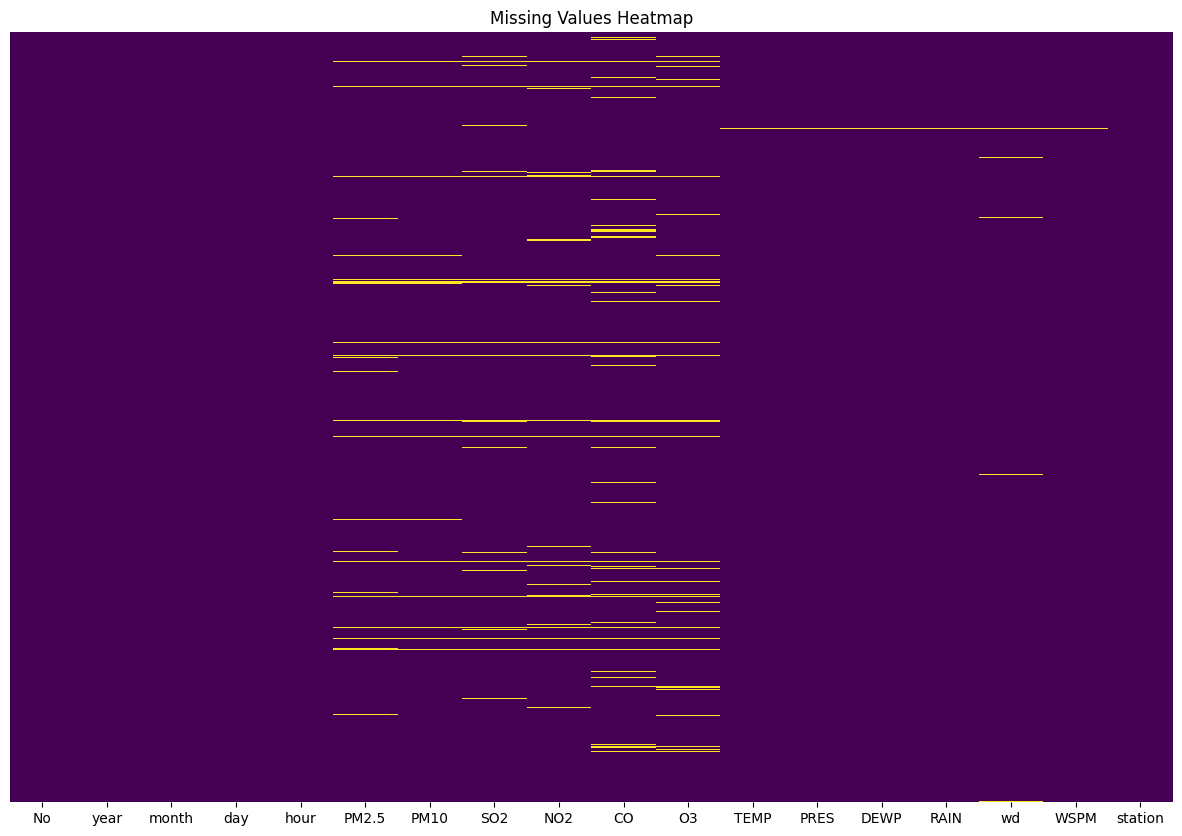

In [9]:
plt.figure(figsize=(15, 10))
sns.heatmap(dfMerge.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title("Missing Values Heatmap")
plt.show()

Mencari nilai value bisa juga menggunakan method .isnull().sum() untuk menampilkan persebaran missing value dan jumlah total missing value yang ada pada sebuah kolom.

In [10]:
dfMerge.isnull().sum()

No             0
year           0
month          0
day            0
hour           0
PM2.5       8739
PM10        6449
SO2         9021
NO2        12116
CO         20701
O3         13277
TEMP         398
PRES         393
DEWP         403
RAIN         390
wd          1822
WSPM         318
station        0
dtype: int64

Menampilkan kolom kolom yang terdapat *missing values* menggunakan persentase untuk mengetahui **berapa total persentase *missing values*** terhadap keseluruhan data. Dari hasil yang sudah diurutkan secara DESCENDING menunjukan bahwa **Missing Values pada kolom CO** terdapat missing value tertinggi yaitu sebesar 4% dari keseluruhan data.

In [11]:
missingValues = dfMerge.isnull().sum()
missingPercentage = (missingValues / len(dfMerge)) * 100

missingDf = pd.DataFrame({
    "Jumlah Missing Values": missingValues,
    "Persentase Missing dalam (%)": missingPercentage
})

missingDf = missingDf[missingDf["Jumlah Missing Values"] > 0]
missingDf = missingDf.sort_values(by="Jumlah Missing Values", ascending=False)
print(missingDf)

       Jumlah Missing Values  Persentase Missing dalam (%)
CO                     20701                      4.919813
O3                     13277                      3.155421
NO2                    12116                      2.879497
SO2                     9021                      2.143937
PM2.5                   8739                      2.076916
PM10                    6449                      1.532674
wd                      1822                      0.433018
DEWP                     403                      0.095777
TEMP                     398                      0.094589
PRES                     393                      0.093401
RAIN                     390                      0.092688
WSPM                     318                      0.075576


#### 2. Duplicate data

Mencari nilai duplikat yang ada dalam dataset menggunakan method *.duplicated().sum()*. Dari hasil yang dieksekusi, **tidak ada duplikat data** yang ada dalam dataset.

In [12]:
duplicatData = dfMerge.duplicated().sum()
print(f"{duplicatData} Duplicat Data")

0 Duplicat Data


#### 3. Invalid value

Mencari *Invalid Value* dari setiap kolom yang ada dalam dataset. Dari hasil yang ada bahwa ada ***Invalid value* pada kolom wd yang berjumlah 1822**. Jumlah ***invalid value* pada kolom wd sama dengan *jumlah missing value*** yang ada pada kolom *wd*. Hal ini menunjukan bahwa *Invalid value* yang ada pada kolom *wd* itu merupakan *missing values*.

In [13]:
invalidValue = {}

invalidValue['No'] = (dfMerge['No'] <= 0).sum() # Kolom no pastinya diatas 0
invalidValue['year'] = ((dfMerge['year'] < 2013) | (dfMerge['year'] > 2017)).sum() # Kolom year hanya pada rentang 2013-2017
invalidValue['month'] = ((dfMerge['month'] < 1) | (dfMerge['month'] > 12)).sum() # kolom month hanya pada rentang 1-12
invalidValue['day'] = ((dfMerge['day'] < 1) | (dfMerge['day'] > 31)).sum() # kolom day hanya pada rentang 1-31
invalidValue['hour'] = ((dfMerge['hour'] < 0) | (dfMerge['hour'] > 23)).sum() # kolom hour menggunakan format 24, jadi dari rentang 0-23
invalidValue['PM2.5'] = (dfMerge['PM2.5'] < 0).sum() # kolom pm2.5 atau konsentrasi partikel udara dengan diameter ≤2.5 µg/m³ dengan diameter harusnya bernilai positif bukan negatif
invalidValue['PM10'] = (dfMerge['PM10'] < 0).sum() # sama halnya kolom pm2.5, kolom pm10 atau konsentrasi partikel udara dengan diameter ≤10 µg/m³ dengan diameter harusnya bernilai positif bukan negatif
invalidValue['SO2'] = (dfMerge['SO2'] < 0).sum() # kolom so2 pasti positif
invalidValue['NO2'] = (dfMerge['NO2'] < 0).sum() # kolom no2 pasti positif
invalidValue['CO'] = (dfMerge['CO'] < 0).sum() # kolom co2 pasti positif
invalidValue['O3'] = (dfMerge['O3'] < 0).sum() # kolom o3 pasti positif
invalidValue['TEMP'] = ((dfMerge['TEMP'] < -50) | (dfMerge['TEMP'] > 50)).sum() # temperatur seharusnya dibawah -50 dan diatas 50 derajat celcius
invalidValue['PRES'] = ((dfMerge['PRES'] < 900) | (dfMerge['PRES'] > 1100)).sum() # pres seharusnya berada pada rentang 900 sampai 1100 hPa
invalidValue['DEWP'] = ((dfMerge['DEWP'] < -50) | (dfMerge['DEWP'] > 50)).sum() #dewp atau kelembapan seharusnya berada pada rentang -50 sampai 50 derajat celcius
invalidValue['RAIN'] = (dfMerge['RAIN'] < 0).sum() # kolom curah hujan pasti positif
allowed_wd = {'NNW', 'N', 'NW', 'NNE', 'ENE', 'E', 'NE', 'W', 'SSW', 'WSW', 'SE','WNW', 'SSE', 'ESE', 'S', 'SW'}
invalidValue['wd'] = (~dfMerge['wd'].isin(allowed_wd)).sum()
invalidValue['WSPM'] = (dfMerge['WSPM'] < 0).sum()
invalidValue['station'] = (dfMerge['station'].isnull() | (dfMerge['station'].str.strip() == "")).sum()

print("Jumlah Invalid Values per Kolom:")
for col, count in invalidValue.items():
    print(f"{col}: {count} Invalid Values")


Jumlah Invalid Values per Kolom:
No: 0 Invalid Values
year: 0 Invalid Values
month: 0 Invalid Values
day: 0 Invalid Values
hour: 0 Invalid Values
PM2.5: 0 Invalid Values
PM10: 0 Invalid Values
SO2: 0 Invalid Values
NO2: 0 Invalid Values
CO: 0 Invalid Values
O3: 0 Invalid Values
TEMP: 0 Invalid Values
PRES: 0 Invalid Values
DEWP: 0 Invalid Values
RAIN: 0 Invalid Values
wd: 1822 Invalid Values
WSPM: 0 Invalid Values
station: 0 Invalid Values


#### 4. Inconsistent Value

*Inconsistent value* biasanya ada di **kolom kategorikal**, karena kolom ini nilainya itu terbatas dan konsisten. Pada **dataset air quality**, hanya ada 2 kolom yaitu *wd* dan *station*. Dari hasil pengecekan inconsistent value pada kolom wd terdapat **1 inconsistent value yaitu nan**, nan ini sendiri sepertinya bisa jadi tersangka atas 1822 missing values dan invalid values pada kolom wd ini sendiri.

In [14]:
dfMerge["wd"].unique()

array(['NNW', 'N', 'NW', 'NNE', 'ENE', 'E', 'NE', 'W', 'SSW', 'WSW', 'SE',
       'WNW', 'SSE', 'ESE', 'S', 'SW', nan], dtype=object)

Selain kolom wd, ada kolom *station* juga yang termasuk kolom kategorikal. Pada kolom station ini tidak terdapat Inconsistent Value.

In [15]:
dfMerge["station"].unique()

array(['Aotizhongxin', 'Changping', 'Dingling', 'Dongsi', 'Guanyuan',
       'Gucheng', 'Huairou', 'Nongzhanguan', 'Shunyi', 'Tiantan',
       'Wanliu', 'Wanshouxigong'], dtype=object)

#### 5. Inaccurate Value

*Inaccurate Value* biasanya terjadi karena **human error atau system error** dan Inaccurate Value terdapat pada kolom numerik, tapi meskipun demikian tidak ada salahnya untuk dicek. Cek *statistis deskriptifnya* dan **cek nilai min dan maxnya**. Dari hasil outputnya ada **nilai 999** yang bisa mengindikasikan sebuah *error* pada **kolom pm2.5** dan **pm10** sedangkan rata ratanya aja hanya 79. Kemudian pada **kolom so2** yang maxnya sampai 500 sedangkan rata ratanya aja hanya 15. Lalu yang terakhir ada pada **kolom co** yang nilai maxnya ada di 10000 sedangkan rata ratanya aja hanya 1000 dan **kolom o3** yang rata ratanya hanya 50 tapi nilai maxnya sampai 1000.

In [16]:
dfMerge[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']].describe()

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,412029.000000,414319.000000,411747.000000,408652.000000,400067.000000,407491.000000,420370.000000,420375.000000,420365.000000,420378.000000,420450.000000
mean,79.793428,104.602618,15.830835,50.638586,1230.766454,57.372271,13.538976,1010.746982,2.490822,0.064476,1.729711
std,80.822391,91.772426,21.650603,35.127912,1160.182716,56.661607,11.436139,10.474055,13.793847,0.821004,1.246386
min,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,0.000000
25%,20.000000,36.000000,3.000000,23.000000,500.000000,11.000000,3.100000,1002.300000,-8.900000,0.000000,0.900000
50%,55.000000,82.000000,7.000000,43.000000,900.000000,45.000000,14.500000,1010.400000,3.100000,0.000000,1.400000
75%,111.000000,145.000000,20.000000,71.000000,1500.000000,82.000000,23.300000,1019.000000,15.100000,0.000000,2.200000
max,999.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,13.200000


Dari hasil **pengecekan nilai 999 pada kolom pm2.5 dan pm10**, ada **1 data pada pm2.5** dan **ada 3 data pada pm10**. Dari hal ini bisa disimpulkan bahwa **nilai 999** yang ada itu bisa jadi karena *kesalahan sistem atau* ada *error pada sensor pengukur konsentrasi udaranya* karena hanya muncul beberapa.

In [17]:
dfMerge[['PM2.5', 'PM10']].isin([999]).sum()

PM2.5    1
PM10     3
dtype: int64

Kolom s2 juga sama, nilai yang mencurigakan hanya ada beberapa yang bisa disimpulkan bisa jadi karena *error pada sensor*.

In [18]:
dfMerge[dfMerge['SO2'] > 400][['SO2']]

,SO2
185872,500.0
200524,500.0
201097,500.0
411481,411.0


Karena jumlahnya banyak mungkin bisa jadi termasuk kedalam *outlier*.

In [19]:
dfMerge[dfMerge['CO'] > 5000][['CO']]

,CO
149,5599.0
150,5700.0
177,5200.0
5804,5200.0
5805,5400.0
...,...
419959,5100.0
420173,5100.0
420174,5300.0
420175,5200.0


Karena dari **hasil output banyak data 1071**, kemungkinan **error alat** atau emang batas dari **pengukuran alat pengukuran**.

In [20]:
dfMerge[dfMerge['O3'] > 500][['O3']]

,O3
109223,1071.0
109224,1071.0
109226,1050.0
109240,1026.0
109241,1071.0
109242,1071.0
109243,1071.0
109244,1071.0
109245,1071.0
109246,1071.0


Bisa jadi termasuk kedalam inaccurate data karena dewp <-40 hanya terjadi pada cuaca dingin yang sangat ekstrem, jadi bisa disimpulkan mungkin karena error pada sensor.

In [21]:
dfMerge[dfMerge['DEWP'] < -40][['DEWP']]

,DEWP
225877,-43.4


#### 6. Outlier

Dari hasil output kode, **terdapat beberapa nilai ekstrim** yang menyimpang dari distribusi data normal. Terdapat nilai outlier pada beberapa kolom, diantaranya PM2.5, SO2, CO, O3, NO2, RAIN DAN WSPM. 

In [22]:
dfNumeric = dfMerge[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']]

outlierValues = {}

for col in dfNumeric.columns:
    data = dfNumeric[col].dropna().values  
    q25 = np.percentile(data, 25)
    q75 = np.percentile(data, 75)
    iqr = q75 - q25
    lowerBound = q25 - 1.5 * iqr
    upperBound = q75 + 1.5 * iqr

    outliers = dfNumeric[col][(dfNumeric[col] < lowerBound) | (dfNumeric[col] > upperBound)]
    outlierValues[col] = outliers

print("Jumlah Outlier per Kolom:")
print(outlierValues)

Jumlah Outlier per Kolom:
{'PM2.5': 120       284.0
121       272.0
136       248.0
140       254.0
141       266.0
          ...  
420459    266.0
420460    264.0
420461    262.0
420462    261.0
420463    256.0
Name: PM2.5, Length: 19142, dtype: float64, 'PM10': 120       315.0
139       338.0
140       396.0
141       380.0
142       335.0
          ...  
420187    409.0
420188    389.0
420358    369.0
420359    410.0
420360    388.0
Name: PM10, Length: 14658, dtype: float64, 'SO2': 33        47.0
42        50.0
43        50.0
44        54.0
45        72.0
          ... 
420537    51.0
420538    56.0
420539    55.0
420540    52.0
420541    47.0
Name: SO2, Length: 35566, dtype: float64, 'NO2': 109       147.0
110       158.0
111       172.0
112       194.0
113       204.0
          ...  
420455    154.0
420456    162.0
420457    158.0
420458    151.0
420459    146.0
Name: NO2, Length: 7021, dtype: float64, 'CO': 117       3100.0
118       3200.0
119       4400.0
120       4000.0
121  

Untuk lebih jelas seberapa ekstrim outlier pada setiap kolom bisa divisualisasikan menggunakan boxplot.

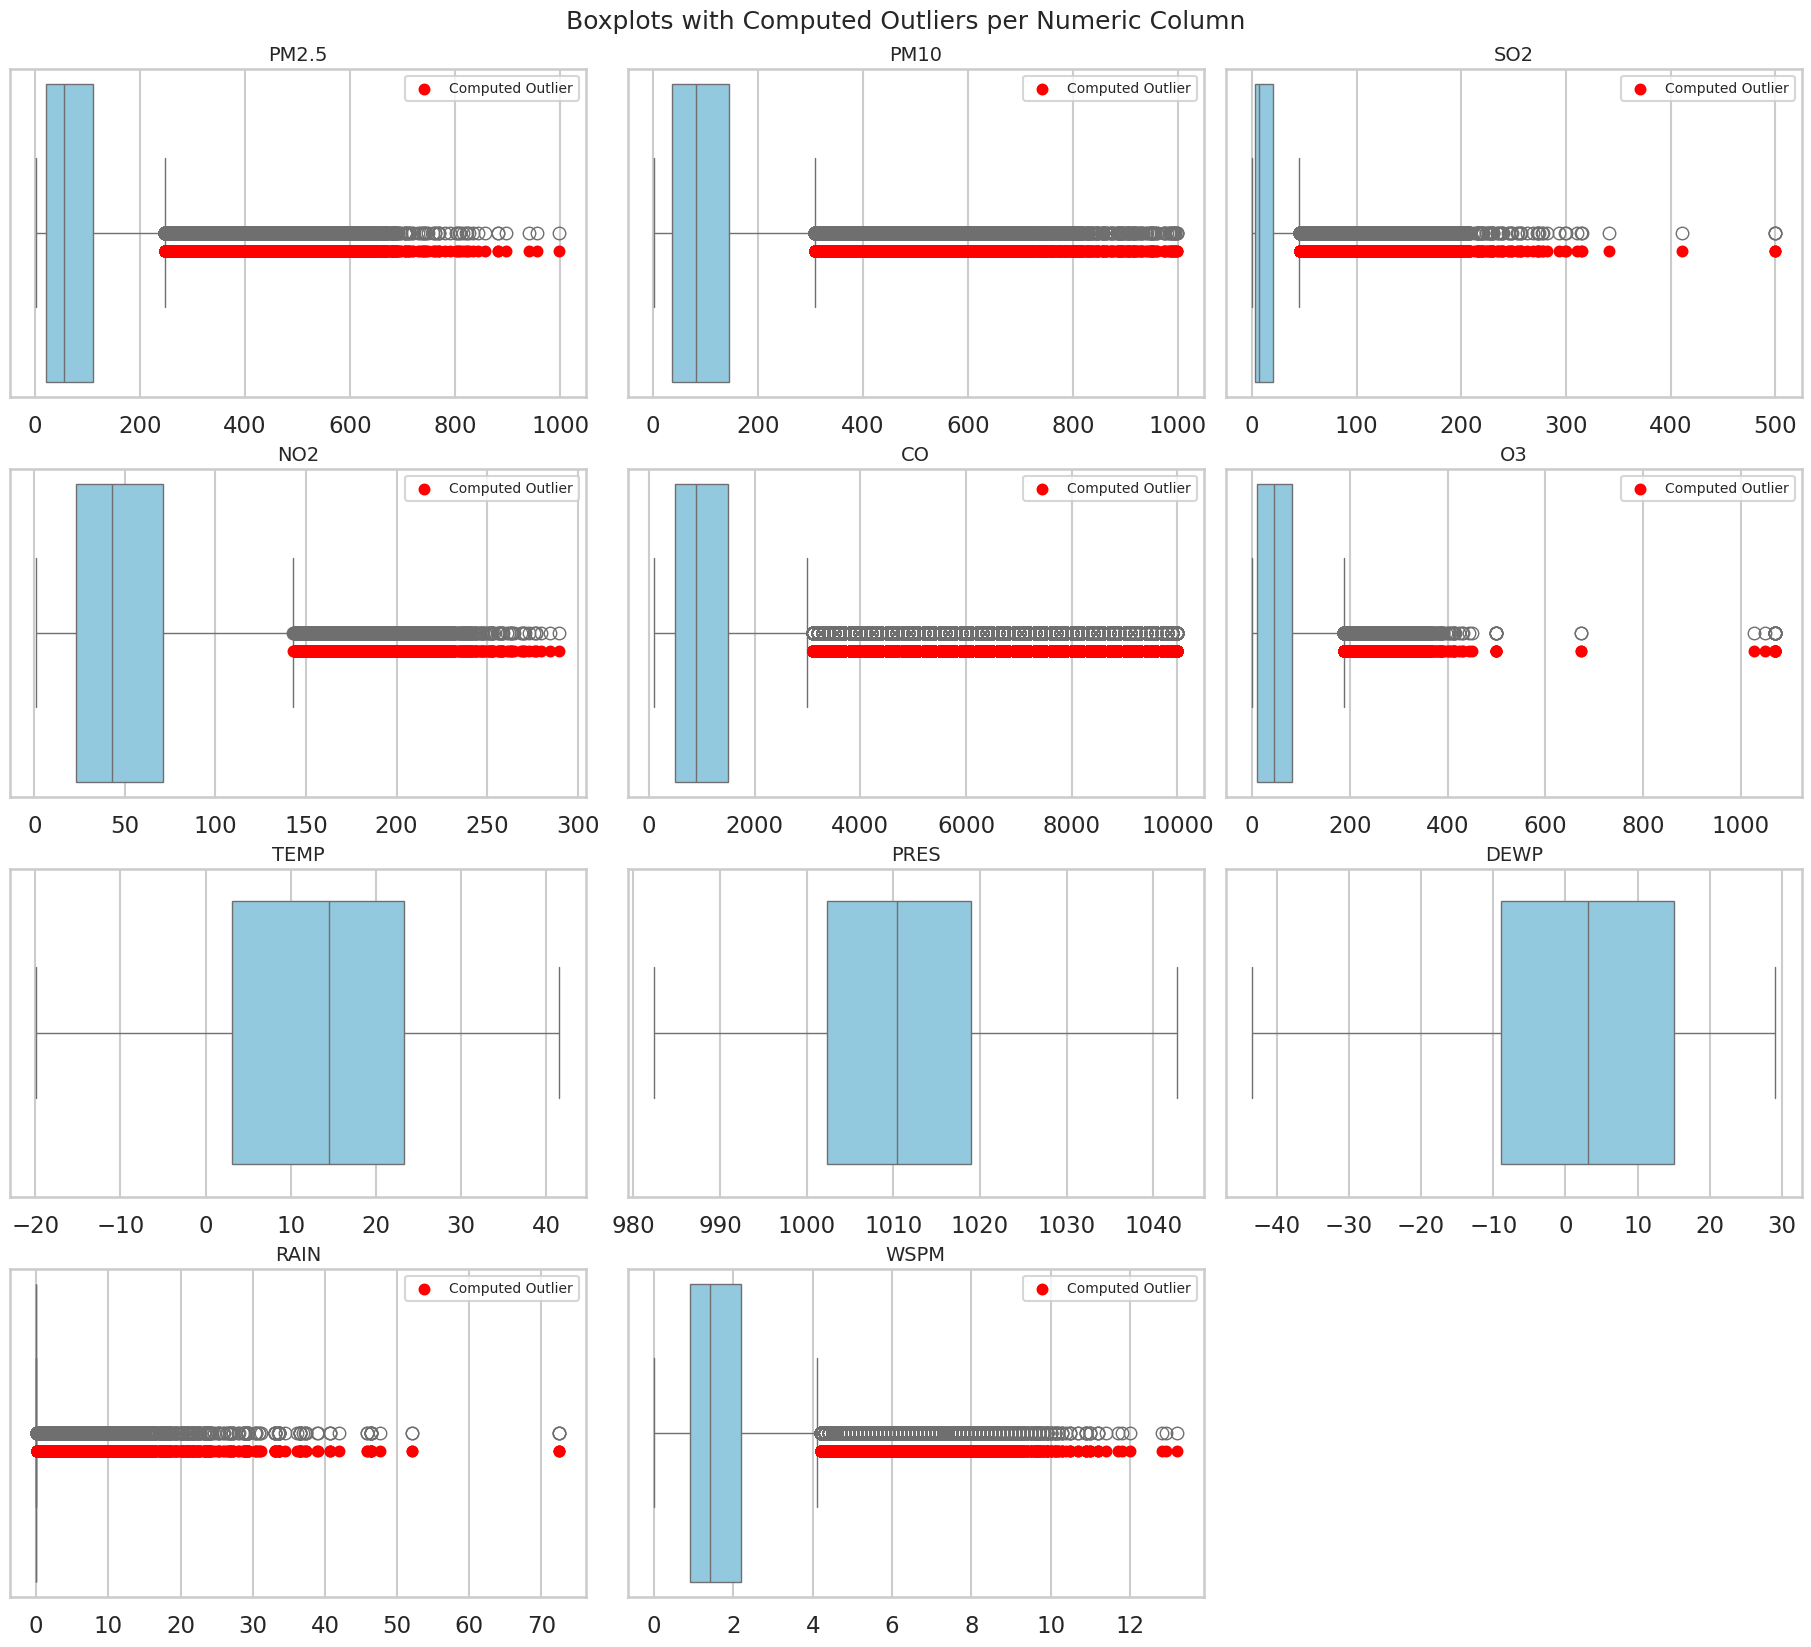

In [23]:
sns.set(style="whitegrid", context="talk")

numCols = dfNumeric.shape[1]
ncols = 3
nrows = int(np.ceil(numCols / ncols))

fig, axes = plt.subplots(nrows, ncols, figsize=(ncols*6, nrows*4), constrained_layout=True)
axes = axes.flatten()

for i, col in enumerate(dfNumeric.columns):
    ax = axes[i]
    sns.boxplot(x=dfNumeric[col], ax=ax, color="skyblue")
    ax.set_title(col, fontsize=14)
    
    outliers = outlierValues[col]
    if not outliers.empty:  # Periksa apakah outliers ada
        ax.scatter(outliers, np.full_like(outliers, 0.05), color='red', s=50, zorder=10, label='Computed Outlier')
        ax.legend(loc="upper right", fontsize=10)

    ax.set_xlabel("")

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle("Boxplots with Computed Outliers per Numeric Column", fontsize=18, y=1.02)
plt.show()

**Insight:**
- **Missing Value** : Dalam Dataset terdapat lumayan banyak kolom yang memiliki missing value, yaitu pada kolom *PM2.5, PM10, SO2, NO2, CO, O3, TEMP, PRES, DEWP, RAIN, wd dan WSPM*.
- **Duplicate Value** : tidak terdapat missing value pada dataset.
- **Invalid Value** : Terdapat nilai invalid value pada kolom wd yang totalnya sama dengan missing value pada kolom wd juga, hal ini bisa disimpulkan bahwa *invalid value kolom wd = missing value pada kolom wd*.
- **Inconsistent Value** : Pada kolom kategorikal seperti statiun dan wd, tidak ada inconsistent value. tapi *terdapat nilai nan pada kolom wd* yang mengindikasikan bahwa ada missing value pada kolom tersebut.
- **Inaccurate Value** : Ada beberapa kolom yang terdapat inaccurate value yaitu *pm2.5, pm10, SO2, CO, O3 dan kolom DEWP* yang mungkin disebabkan oleh error pada alat sensor.
- **Outlier** :  Beberapa kolom yang memiliki outlier dengan nilai yang sangat ekstrim, diantaranya PM2.5, PM10, SO2, NO2, CO, O3, RAIN, dan WSPM.


Tabel dibawah ini untuk insight lebih jelasnya : 
| Column   | Missing Value | Duplicate Value | Invalid Value | Inconsistent Value | Inaccurate Value | Outlier    |
|----------|---------------|-----------------|---------------|--------------------|------------------|------------|
| PM2.5    | 8,739         | 0               | 0             | 0                  | 1 (value=999)    | 19,142     |
| PM10     | 6,449         | 0               | 0             | 0                  | 3 (value=999)    | 14,658    |
| SO2      | 9,021         | 0               | 0             | 0                  | 4 (values > 400)  | 35,566        |
| NO2      | 12,116        | 0               | 0             | 0                  | 0              | 7,021       |
| CO       | 20,701        | 0               | 0             | 0                  | 6,991            | 28,054        |
| O3       | 13,277        | 0               | 0             | 0                  | ~30 (values=1071)| 16,599        |
| TEMP     | 398           | 0               | 0             | 0                  | 0                | 0          |
| PRES     | 393           | 0               | 0             | 0                  | 0                | 0          |
| DEWP     | 403           | 0               | 0             | 0                  | 1 (value=-43.4)  | 0          |
| RAIN     | 390           | 0               | 0             | 0                  | 0                | 16, 520     |
| wd       | 1,822         | 0               | 1,822         | 1 (nan)                  | 0                | N/A        |
| WSPM     | 318           | 0               | 0             | 0                  | 0                | 23,079     |
| station     | 0           | 0               | 0             | 0                  | 0                | N/A     |


### Cleaning Data

#### 1. Handling Missing Values

Karena datanya ada kolom waktu yaitu *year, month, day dan hour*, nilai **missing value** bisa diisi dengan **teknik interpolasi** berbasis waktu dengan membuat kolom datetime dari beberapa kolom waktu. Teknik ini digunakan untuk **mengurutkan data secara kronologis dan menangkap pola musiman serta tren temporal** yang ada didalam data.

In [24]:
dfMerge['datetime'] = pd.to_datetime(dfMerge[['year', 'month', 'day', 'hour']])
dfMerge.sort_values('datetime', inplace=True)
dfMerge.set_index('datetime', inplace=True)

Menggunakan method *.head()* untuk melihat apakah kolom datetime sudah berhasil dibuat.

In [25]:
dfMerge.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
datetime,,,,,,,,,,,,,,,,,,
2013-03-01,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
2013-03-01,1,2013,3,1,0,6.0,6.0,4.0,8.0,300.0,81.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Tiantan
2013-03-01,1,2013,3,1,0,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling
2013-03-01,1,2013,3,1,0,8.0,8.0,6.0,28.0,400.0,52.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Wanliu
2013-03-01,1,2013,3,1,0,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,E,0.5,Changping


Pada kolom kolom numerikal, **missing value akan diisi menggunakan teknik interpolasi berbasis waktu** yang artinya nilai yang hilang akan diisi dengan **nilai rata rata linear tertimbang berdasarkan nilai nilai yang diketahui sebelum dan sesudah nilai yang hilang**. Misalnya pada jam 15.00 nilai pm2.5 adalah 100 dan pada jam 17.00 nilai pm2.5 adalah 200, maka nilai pm2.5 pada jam 16.00 adalah 150.

In [26]:
colsNumeric = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']
dfMerge[colsNumeric] = dfMerge[colsNumeric].interpolate(method='time')

Untuk **kolom kategorikal wd menggunakan modus**, yaitu mengisi nilai yang kosong dengan nilai yang paling sering muncul.

In [27]:
dfMerge['wd'] = dfMerge['wd'].fillna(dfMerge['wd'].mode()[0])

Dari hasil output kode menunjukan bahwa sudah tidak ada missing values lagi dalam dataset.

In [28]:
dfMerge.isnull().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

#### 2. Handling Invalid Values

Karena hasil analisis tadi adalah **missing value wd = invalid value wd**, maka ketika missing value sudah diisi hasilnya kolom wd tidak memiliki invalid value.

In [29]:
invalidValue = {}
allowed_wd = {'NNW', 'N', 'NW', 'NNE', 'ENE', 'E', 'NE', 'W', 'SSW', 'WSW', 'SE', 'WNW', 'SSE', 'ESE', 'S', 'SW'}
invalidValue['wd'] = (~dfMerge['wd'].isin(allowed_wd)).sum()

print("Jumlah Invalid Values per Kolom:")
print(f"wd: {invalidValue['wd']} Invalid Values (allowed values: {allowed_wd})")

Jumlah Invalid Values per Kolom:
wd: 0 Invalid Values (allowed values: {'W', 'E', 'WSW', 'NNE', 'S', 'SSW', 'NE', 'NW', 'SE', 'SW', 'NNW', 'ESE', 'SSE', 'N', 'ENE', 'WNW'})


#### 3. Handling Inconsistent Values

Karena hasil analisis sebelumnya juga yang **terdapat nilai nan pada wd yang merupakan missing value**, jadi ketika missing valuenya sudah dihandling maka nilai inconsistent value juga terhandling.

In [30]:
dfMerge["wd"].unique()

array(['NNW', 'E', 'NW', 'WNW', 'N', 'ENE', 'NNE', 'W', 'NE', 'SSW',
       'ESE', 'SE', 'S', 'SSE', 'SW', 'WSW'], dtype=object)

#### 4. Handling Inaccurate Values

Nilai nilai yang ekstrim akan diubah menjadi nilai nan menggunakan numpy, kemudian nilai nan akan diisi menggunakan nilai median dari kolom masing masing.

In [31]:
dfMerge.loc[dfMerge['PM2.5'] == 999, 'PM2.5'] = np.nan
dfMerge.loc[dfMerge['PM10'] == 999, 'PM10'] = np.nan
dfMerge.loc[dfMerge['SO2'] > 400, 'SO2'] = np.nan
dfMerge.loc[dfMerge['CO'] > 5000, 'CO'] = np.nan
dfMerge.loc[dfMerge['O3'] > 500, 'O3'] = np.nan
dfMerge.loc[dfMerge['DEWP'] < -40, 'DEWP'] = np.nan

cols_to_impute = ['PM2.5', 'PM10', 'SO2', 'CO', 'O3', 'DEWP']
for col in cols_to_impute:
    median_val = dfMerge[col].median()
    dfMerge[col] = dfMerge[col].fillna(median_val)

In [32]:
print(dfMerge[['PM2.5', 'PM10', 'SO2', 'CO', 'O3', 'DEWP']].describe())

               PM2.5           PM10            SO2             CO  \
count  420768.000000  420768.000000  420768.000000  420768.000000   
mean       79.838157     104.832251      15.872244    1133.700479   
std        81.002682      92.469826      21.694862     909.203724   
min         2.000000       2.000000       0.285600     100.000000   
25%        20.000000      36.000000       3.000000     500.000000   
50%        55.000000      82.000000       7.000000     900.000000   
75%       111.000000     145.000000      20.000000    1500.000000   
max       957.000000     995.000000     341.000000    5000.000000   

                  O3           DEWP  
count  420768.000000  420768.000000  
mean       56.978065       2.482672  
std        56.238768      13.797153  
min         0.214200     -36.000000  
25%        10.000000      -8.900000  
50%        44.000000       3.000000  
75%        82.000000      15.100000  
max       500.000000      29.100000  


#### 5. Handling Outlier

Nilai nilai yang berada diluar batas IQR akan diubah menjadi nilai minimum dan maksimum dari IQR. Handling ouutlier mengecualikan kolom RAIN, karena pada kolom RAIN terdapat sangat banyak nilai 0 dari pada nilai > 0. Jika memasukan kolom RAIN maka semua nilai > 0 akan terhapus semua karena dianggap outlier. Jadi untuk kolom RAIN akan dihandling menggunakan Transformation dan Spearman.


Summary setelah penanganan outlier:
               PM2.5           PM10            SO2            NO2  \
count  420768.000000  420768.000000  420768.000000  420768.000000   
mean       76.046693     101.385491      13.511715      50.244067   
std        68.241306      80.090221      14.053138      33.854418   
min         2.000000       2.000000       0.285600       1.026500   
25%        20.000000      36.000000       3.000000      23.000000   
50%        55.000000      82.000000       7.000000      43.000000   
75%       111.000000     145.000000      20.000000      71.000000   
max       247.500000     308.500000      45.500000     143.000000   

                  CO             O3           TEMP           PRES  \
count  420768.000000  420768.000000  420768.000000  420768.000000   
mean     1091.141396      55.457657      13.532050    1010.753862   
std       784.585893      51.532045      11.437558      10.474894   
min       100.000000       0.214200     -19.900000     982.400000

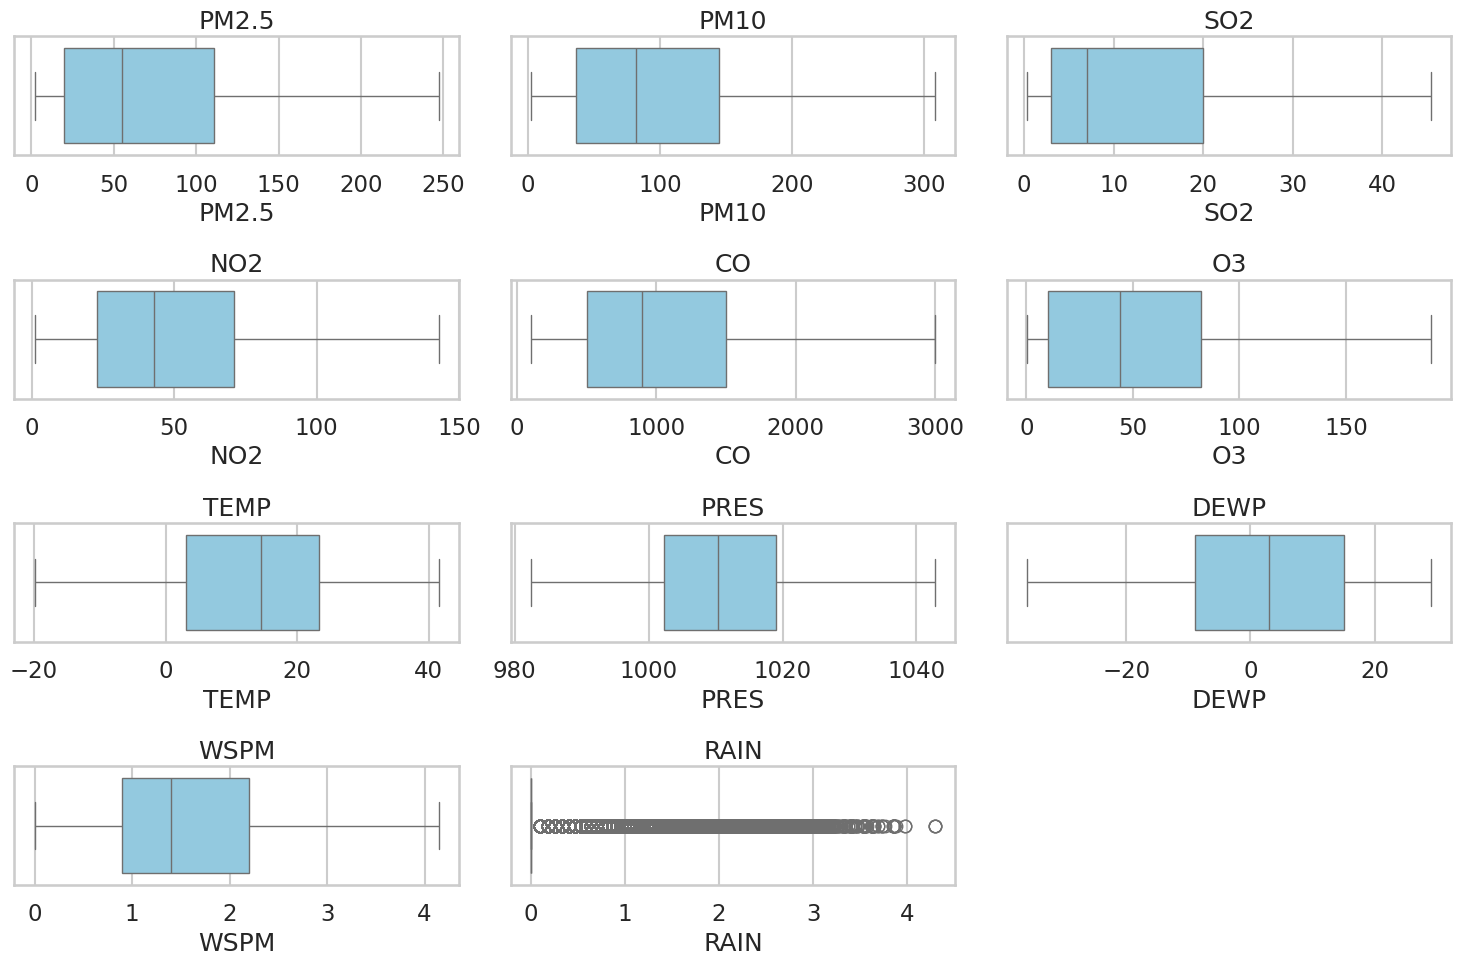

In [33]:
colsNumeric = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'WSPM']

for col in colsNumeric:
    data = dfMerge[col].dropna()
    q25, q75 = np.percentile(data, [25, 75])
    iqr = q75 - q25
    minimum = q25 - 1.5 * iqr
    maximum = q75 + 1.5 * iqr
    
    dfMerge[col] = dfMerge[col].mask(dfMerge[col] > maximum, maximum)
    dfMerge[col] = dfMerge[col].mask(dfMerge[col] < minimum, minimum)

dfMerge["RAIN"] = np.log1p(dfMerge["RAIN"])
colsNumeric = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'WSPM', 'RAIN']

print("\nSummary setelah penanganan outlier:")
print(dfMerge[colsNumeric].describe())

plt.figure(figsize=(15, 10))
for i, col in enumerate(colsNumeric):
    plt.subplot(4, 3, i+1)
    sns.boxplot(x=dfMerge[col], color='skyblue')
    plt.title(col)
plt.tight_layout()
plt.show()

Setelah dataset dibersihkan, dataset kemudian disave kedalam file baru bernama main_data.csv yang letaknya didalam folder dashboard.

In [34]:
dfMerge.reset_index(inplace=True, drop=True)
dfMerge.to_csv("/mnt/d/Artificial Intellegence/Machine Learning/CodingCamp/dashboard/main_data.csv", index=False)

**Insight:**
- Handling Missing Values : Dataset mempunyai kolom year, month, day, hour yang bisa dirubah menjadi kolom datetime, kolom datetime bisa digunakan untuk teknik interpolasi berbasis waktu untuk mengisi missing value dengan teknik tersebut pada kolom numerik. Jadi untuk menghandling missing value pada kolom numerik pada dataset ini menggunakan teknik interpolasi berbasis waktu. Sedangkan handling missing value pada kolom kategorikal seperti wd, missing valuenya diisi menggunakan modus.
- Handling Invalid Values : Invalid value hanya ada pada kolom wd yang jumlahnya sama persis seperti jumlah missing value pada kolom yang sama. Setelah melakukan handling missing value, invalid value juga hilang yang menandakan data invalid value adalah data missing value.
- Handling Inconsistent Values : Sama halnya sebelumnya, ada inconsistent value pada kolom wd yang nilainya "nan" sudah bersih atau sudah hilang karena missing valuenya sudah dihandling.
- Handling Inaccurate Values : Ada beberapa kolom yang memiliki inaccurate value seperti PM2.5, PM10, SO2, CO, O3, dan DEWP ditangani dengan merubah nilai yang eksremnya dengan nan, kemudian nan atau missing valuenya diisi menggunakan median.
- Handling Outlier : Menangani Outlier menggunakan metode IQR dimana nilai yang diluar batas (Q1-1.5xIQR) dan (Q3+1.5xIQR) akan diubah menjadi nilai minimum atau maksimum dari IQR. Kecuali untuk kolom RAIN menggunakan transform log untuk menangani outliernya.
- Save dataset bersih kedalam dashboard/main_data.csv

## Exploratory Data Analysis (EDA)

### Explore ...

1. Load Dataset yang sudah melalui tahap data wrangling.

In [2]:
path = "/mnt/d/Artificial Intellegence/Machine Learning/CodingCamp/dashboard/main_data.csv"
df = pd.read_csv(path)

2. Menggunakan method .info() untuk melihat struktur dataset.

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       420768 non-null  int64  
 1   year     420768 non-null  int64  
 2   month    420768 non-null  int64  
 3   day      420768 non-null  int64  
 4   hour     420768 non-null  int64  
 5   PM2.5    420768 non-null  float64
 6   PM10     420768 non-null  float64
 7   SO2      420768 non-null  float64
 8   NO2      420768 non-null  float64
 9   CO       420768 non-null  float64
 10  O3       420768 non-null  float64
 11  TEMP     420768 non-null  float64
 12  PRES     420768 non-null  float64
 13  DEWP     420768 non-null  float64
 14  RAIN     420768 non-null  float64
 15  wd       420768 non-null  object 
 16  WSPM     420768 non-null  float64
 17  station  420768 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 57.8+ MB


3. Membuat kolom datetime dari kolom year, month, day, dan hour untuk analisis time series.

In [14]:
df['datetime'] = pd.to_datetime(df[['year','month','day','hour']])
    
df.set_index('datetime', inplace=True)

4. Mengecek kolom datetime apakah sudah berhasil dibuat.

In [64]:
df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
datetime,,,,,,,,,,,,,,,,,,
2013-03-01,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.15,Aotizhongxin
2013-03-01,1,2013,3,1,0,6.0,6.0,4.0,8.0,300.0,81.0,-0.5,1024.5,-21.4,0.0,NNW,4.15,Tiantan
2013-03-01,1,2013,3,1,0,4.0,4.0,3.0,20.0,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.50,Dingling
2013-03-01,1,2013,3,1,0,8.0,8.0,6.0,28.0,400.0,52.0,-0.7,1023.0,-18.8,0.0,NNW,4.15,Wanliu
2013-03-01,1,2013,3,1,0,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,E,0.50,Changping


5. Mengunakan method .describe() untuk analsis deskriptif hanya pada kolom numerik.

In [39]:
df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,76.046693,101.385491,13.511715,50.244067,1091.141396,55.457657,13.532050,1010.753862,2.482672,0.025025,1.668633
std,10122.116943,1.177198,3.448707,8.800102,6.922195,68.241306,80.090221,14.053138,33.854418,784.585893,51.532045,11.437558,10.474894,13.797153,0.180044,1.062436
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-36.000000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,20.000000,36.000000,3.000000,23.000000,500.000000,10.000000,3.100000,1002.300000,-8.900000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,55.000000,82.000000,7.000000,43.000000,900.000000,44.000000,14.500000,1010.400000,3.000000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,111.000000,145.000000,20.000000,71.000000,1500.000000,82.000000,23.300000,1019.000000,15.100000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,247.500000,308.500000,45.500000,143.000000,3000.000000,190.000000,41.600000,1042.800000,29.100000,4.297285,4.150000


6. Menggunakan method .describe(include="all") untuk analisis deskriptif termasuk kolom numerik.

In [40]:
df.describe(include="all")

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
count,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768,420768.000000,420768
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,12
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NE,NaN,Aotizhongxin
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45157,NaN,35064
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,76.046693,101.385491,13.511715,50.244067,1091.141396,55.457657,13.532050,1010.753862,2.482672,0.025025,NaN,1.668633,NaN
std,10122.116943,1.177198,3.448707,8.800102,6.922195,68.241306,80.090221,14.053138,33.854418,784.585893,51.532045,11.437558,10.474894,13.797153,0.180044,NaN,1.062436,NaN
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-36.000000,0.000000,NaN,0.000000,NaN
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,20.000000,36.000000,3.000000,23.000000,500.000000,10.000000,3.100000,1002.300000,-8.900000,0.000000,NaN,0.900000,NaN
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,55.000000,82.000000,7.000000,43.000000,900.000000,44.000000,14.500000,1010.400000,3.000000,0.000000,NaN,1.400000,NaN
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,111.000000,145.000000,20.000000,71.000000,1500.000000,82.000000,23.300000,1019.000000,15.100000,0.000000,NaN,2.200000,NaN


7. Menggunakan histogram untuk memvisualisasikan distribusi data numerik pada kolom numerik. Dari hasil visualisasi banyak kolom yang memiliki data numerik left skewed.

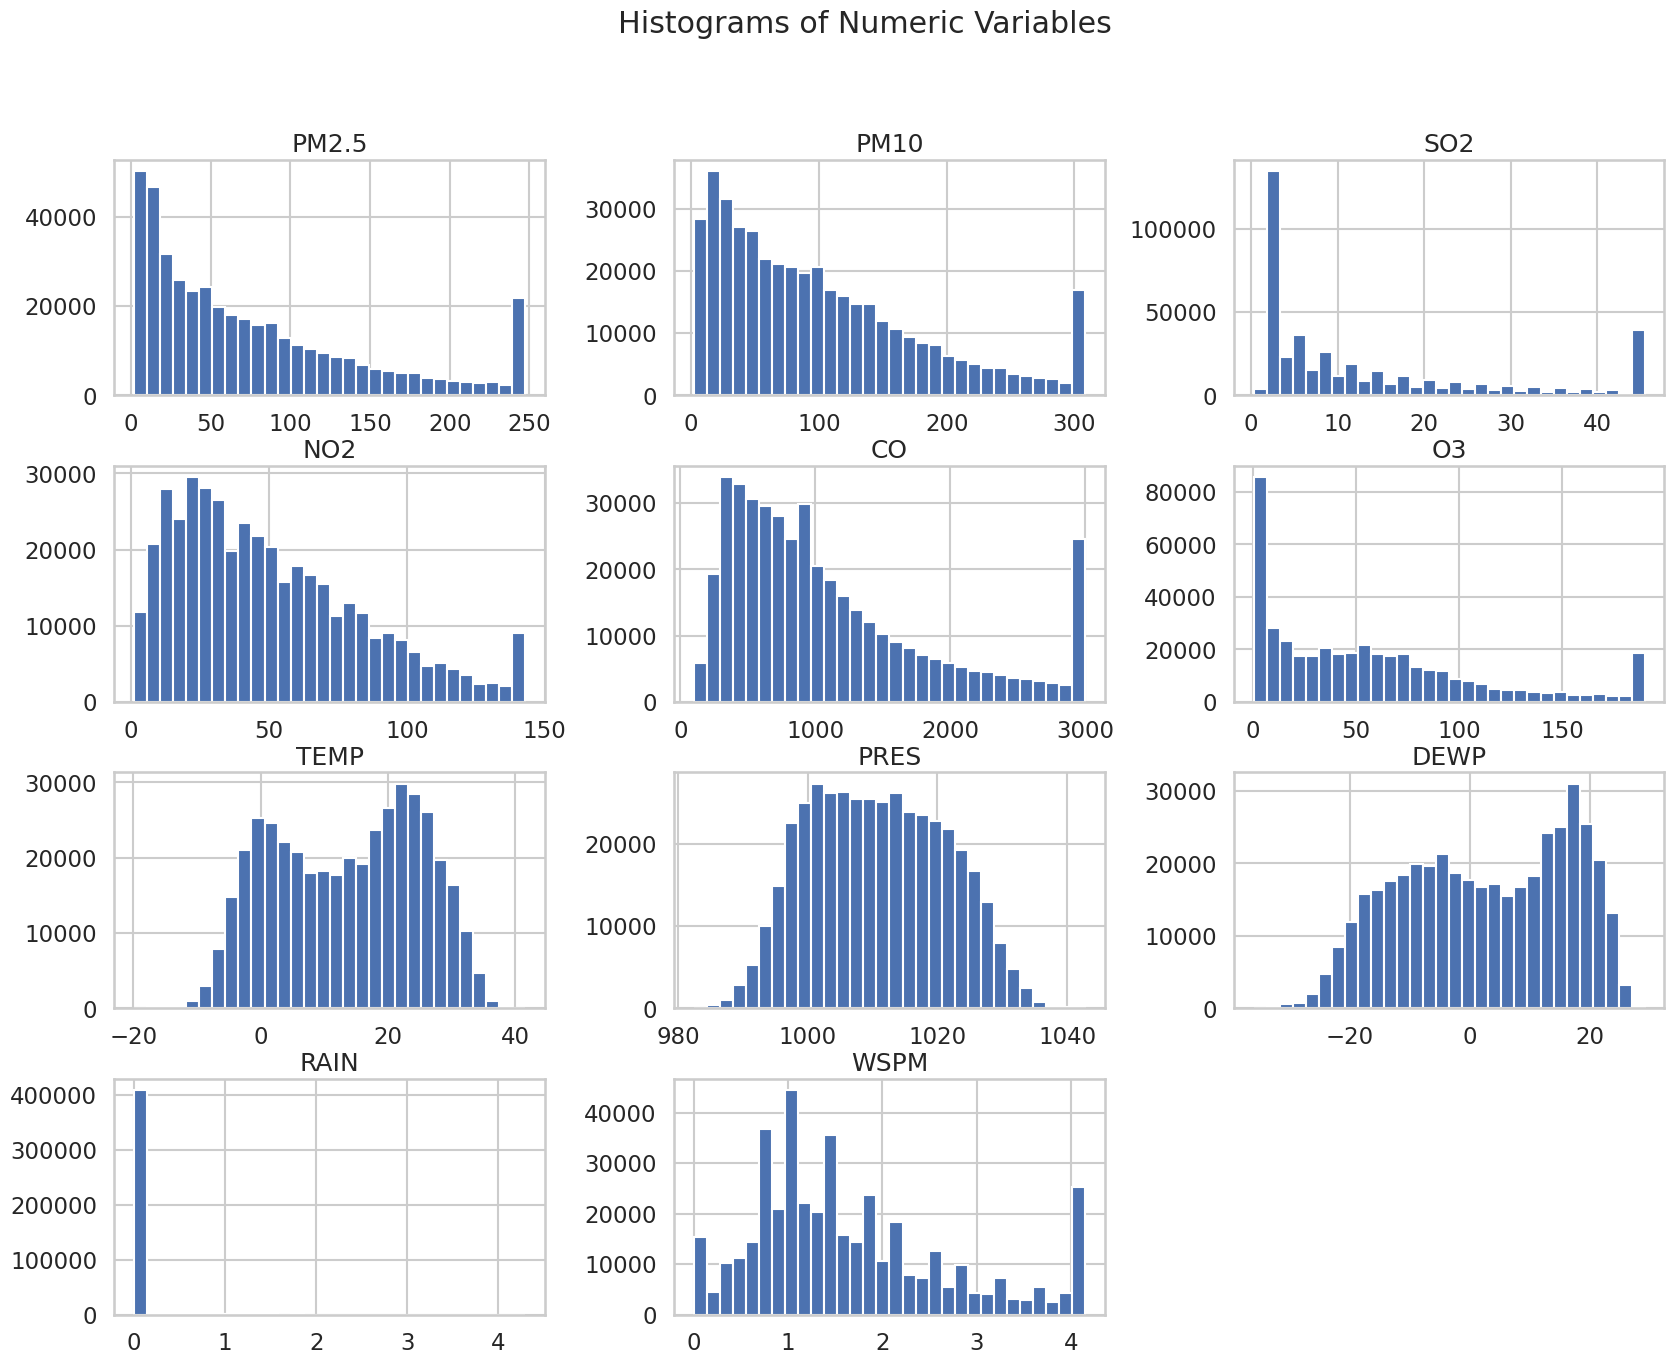

In [41]:
numeric_cols = ["PM2.5", "PM10", "SO2", "NO2", "CO", "O3", "TEMP", "PRES", "DEWP", "RAIN", "WSPM"]

df[numeric_cols].hist(bins=30, figsize=(20, 15))
plt.suptitle("Histograms of Numeric Variables")
plt.show()

8. Memvisualisasi matriks korelasi antar kolom numerik untuk mencari tau apakah ada kolom yang berkorelasi, makin mendekati 1 makin berkorelasi kolomnya. Contoh kolom yang berkorelasi itu diantaranya PM2.5 dengan PM10, SO2, NO2, dan CO.

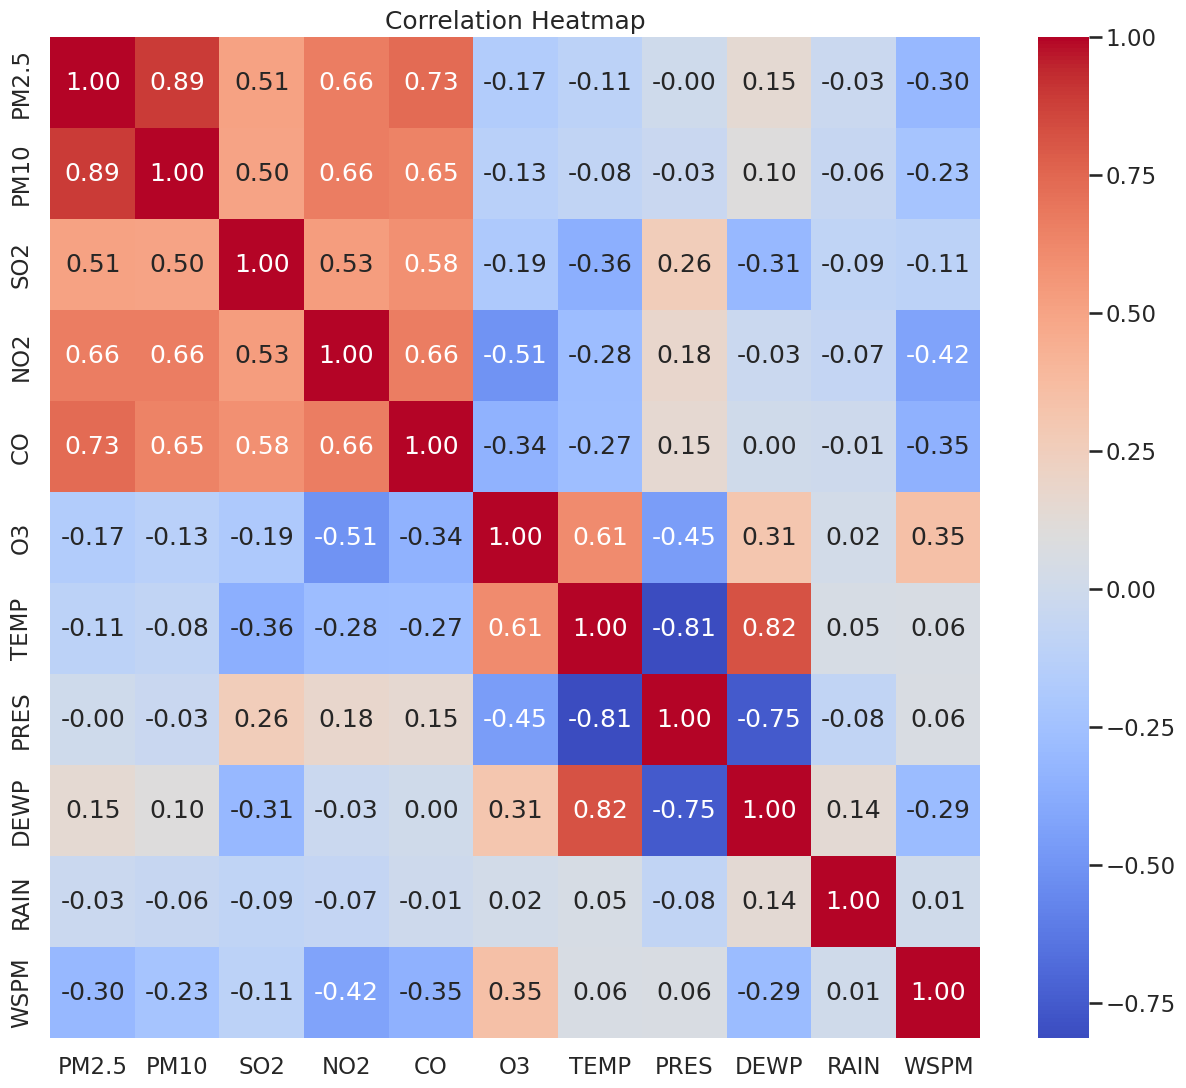

In [42]:
plt.figure(figsize=(15, 13))
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

9. Memvisualisasikan Tren dari PM2.5 dari tahun 2013-2017.

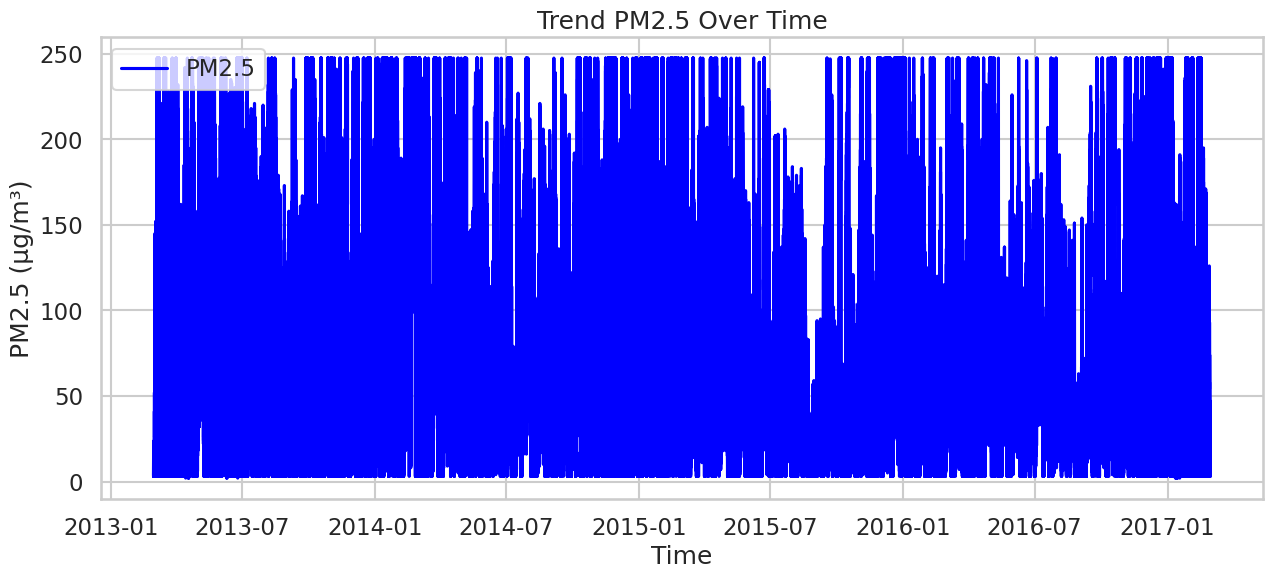

In [66]:
plt.figure(figsize=(15, 6))
plt.plot(df.index, df["PM2.5"], label="PM2.5", color='blue')
plt.title("Trend PM2.5 Over Time")
plt.xlabel("Time")
plt.ylabel("PM2.5 (µg/m³)")
plt.legend()
plt.show()

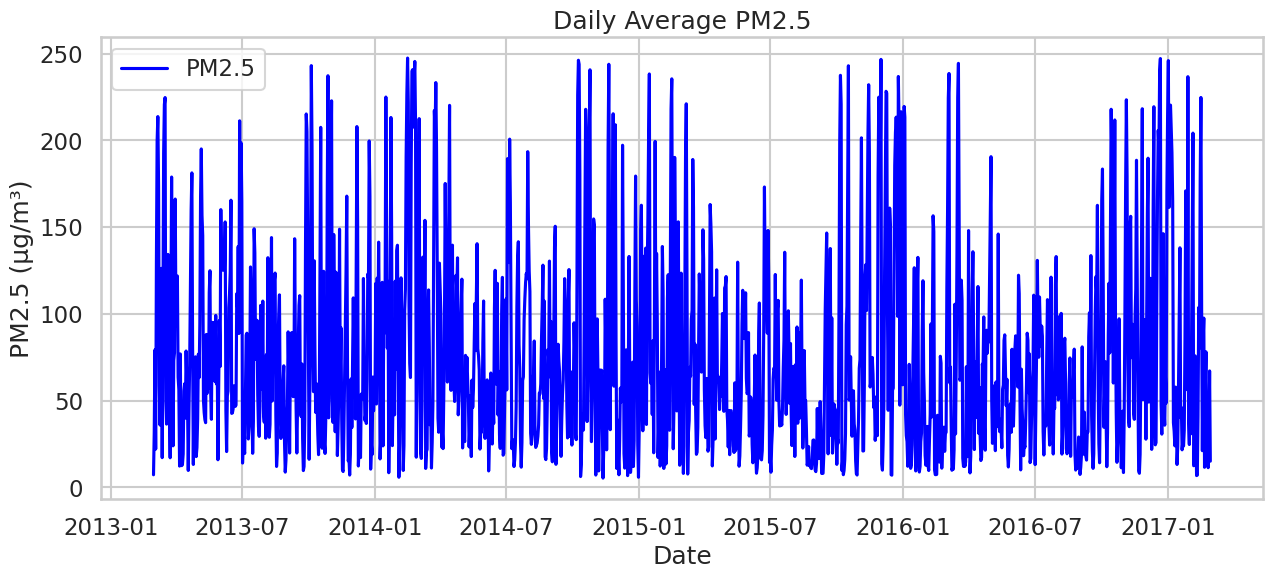

In [ ]:
numeric_df = df[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']]
df_daily = numeric_df.resample('D').mean()

plt.figure(figsize=(15, 6))
plt.plot(df_daily.index, df_daily["PM2.5"], label="PM2.5", color='blue')
plt.title("Daily Average PM2.5")
plt.xlabel("Date")
plt.ylabel("PM2.5 (µg/m³)")
plt.legend()
plt.show()

10. Memvisualisasikan Rata rata data dari Kolom PM2.5 dari ke 12 Station, dimana Station yang memiliki nilai PM2.5 tertinggi adalah Station Dongsi.


=== Average Measurements per Station ===
station
Aotizhongxin     78.451208
Changping        69.383246
Dingling         64.096961
Dongsi           81.256105
Guanyuan         78.907827
Gucheng          79.766506
Huairou          67.623949
Nongzhanguan     79.786874
Shunyi           75.570484
Tiantan          78.280993
Wanliu           79.360280
Wanshouxigong    80.075880
Name: PM2.5, dtype: float64


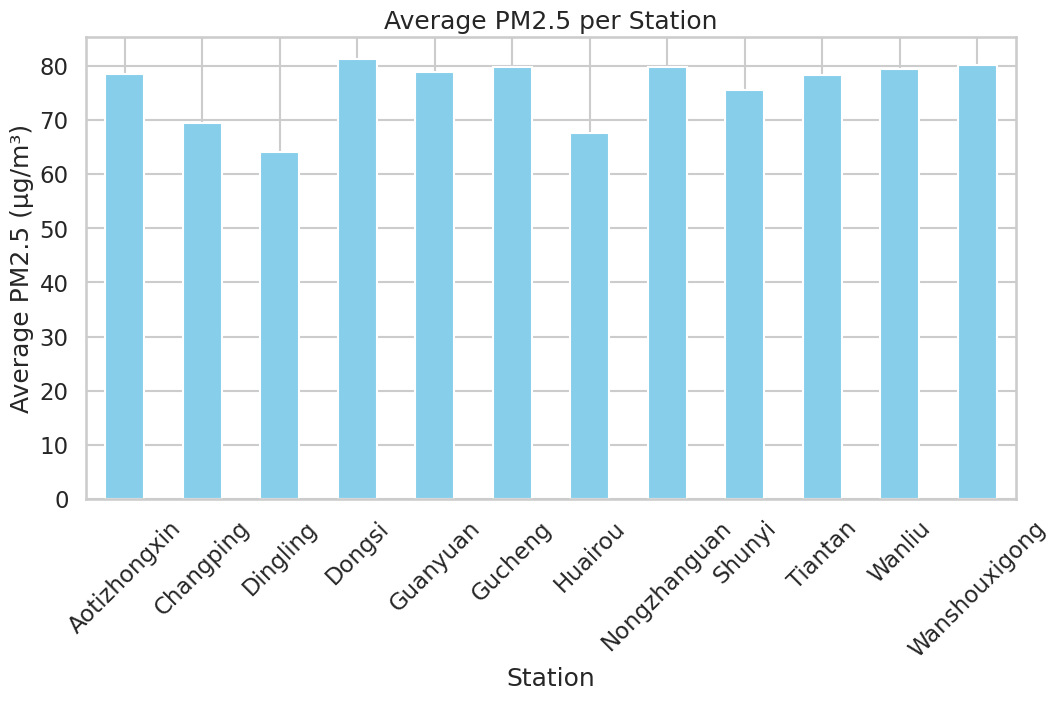

In [49]:
station_summary = df.groupby("station")[numeric_cols].mean()
print("\n=== Average Measurements per Station ===")
print(station_summary["PM2.5"])

plt.figure(figsize=(12,6))
station_summary["PM2.5"].plot(kind='bar', color='skyblue')
plt.title("Average PM2.5 per Station")
plt.xlabel("Station")
plt.ylabel("Average PM2.5 (µg/m³)")
plt.xticks(rotation=45)
plt.show()

11. Memvisualisasikan Rata rata data dari Kolom PM10 dari ke 12 Station, dimana Station yang memiliki nilai PM10 tertinggi adalah Station Gucheng.


=== Average Measurements per Station ===
station
Aotizhongxin     106.246822
Changping         92.895678
Dingling          82.473841
Dongsi           105.663925
Guanyuan         105.510576
Gucheng          114.859521
Huairou           89.957975
Nongzhanguan     105.039287
Shunyi            96.068779
Tiantan          103.122121
Wanliu           107.033654
Wanshouxigong    107.753709
Name: PM10, dtype: float64


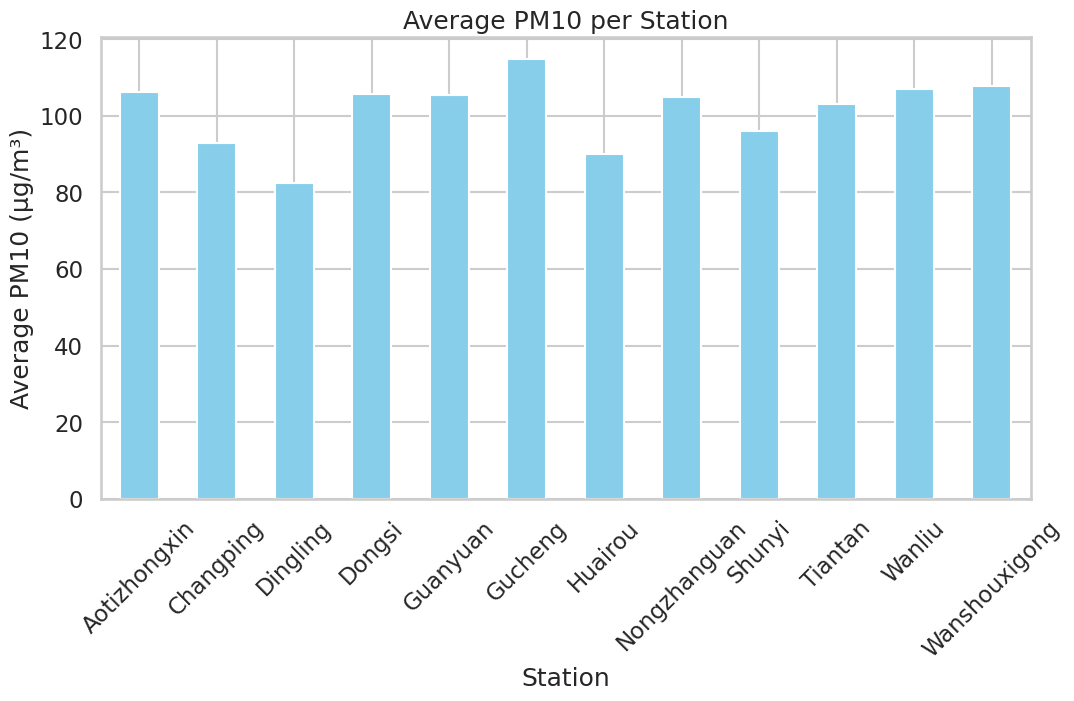

In [50]:
print("\n=== Average Measurements per Station ===")
print(station_summary["PM10"])

plt.figure(figsize=(12,6))
station_summary["PM10"].plot(kind='bar', color='skyblue')
plt.title("Average PM10 per Station")
plt.xlabel("Station")
plt.ylabel("Average PM10 (µg/m³)")
plt.xticks(rotation=45)
plt.show()

12. Memvisualisasikan Rata rata data dari Kolom SO2 dari ke 12 Station, dimana Station yang memiliki nilai SO2 tertinggi adalah Station Dongsi.


=== Average Measurements per Station ===
station
Aotizhongxin     14.688300
Changping        12.775638
Dingling         10.931107
Dongsi           15.626700
Guanyuan         14.604514
Gucheng          13.330430
Huairou          10.690791
Nongzhanguan     15.380540
Shunyi           11.780293
Tiantan          12.571612
Wanliu           15.573234
Wanshouxigong    14.187418
Name: SO2, dtype: float64


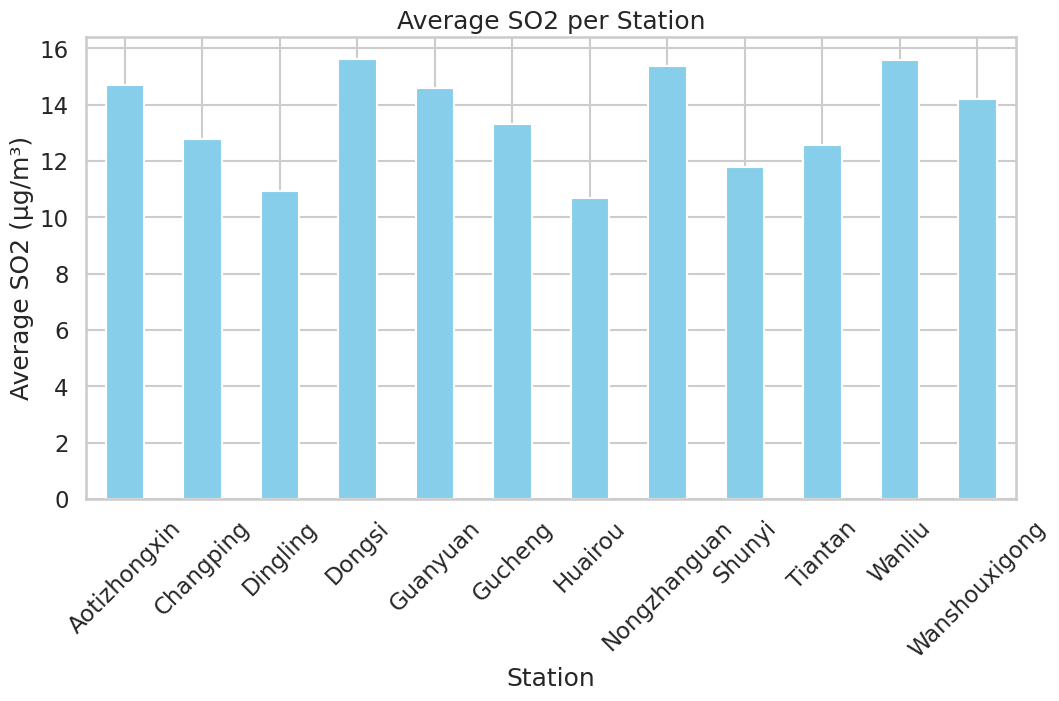

In [51]:
print("\n=== Average Measurements per Station ===")
print(station_summary["SO2"])

plt.figure(figsize=(12,6))
station_summary["SO2"].plot(kind='bar', color='skyblue')
plt.title("Average SO2 per Station")
plt.xlabel("Station")
plt.ylabel("Average SO2 (µg/m³)")
plt.xticks(rotation=45)
plt.show()

13. Memvisualisasikan Rata rata data dari Kolom NO2 dari ke 12 Station, dimana Station yang memiliki nilai NO2 tertinggi adalah Station Wanliu.


=== Average Measurements per Station ===
station
Aotizhongxin     58.550022
Changping        44.136672
Dingling         28.006698
Dongsi           53.460921
Guanyuan         57.300626
Gucheng          55.353467
Huairou          32.988593
Nongzhanguan     57.401567
Shunyi           44.035754
Tiantan          52.869656
Wanliu           63.797818
Wanshouxigong    55.027015
Name: NO2, dtype: float64


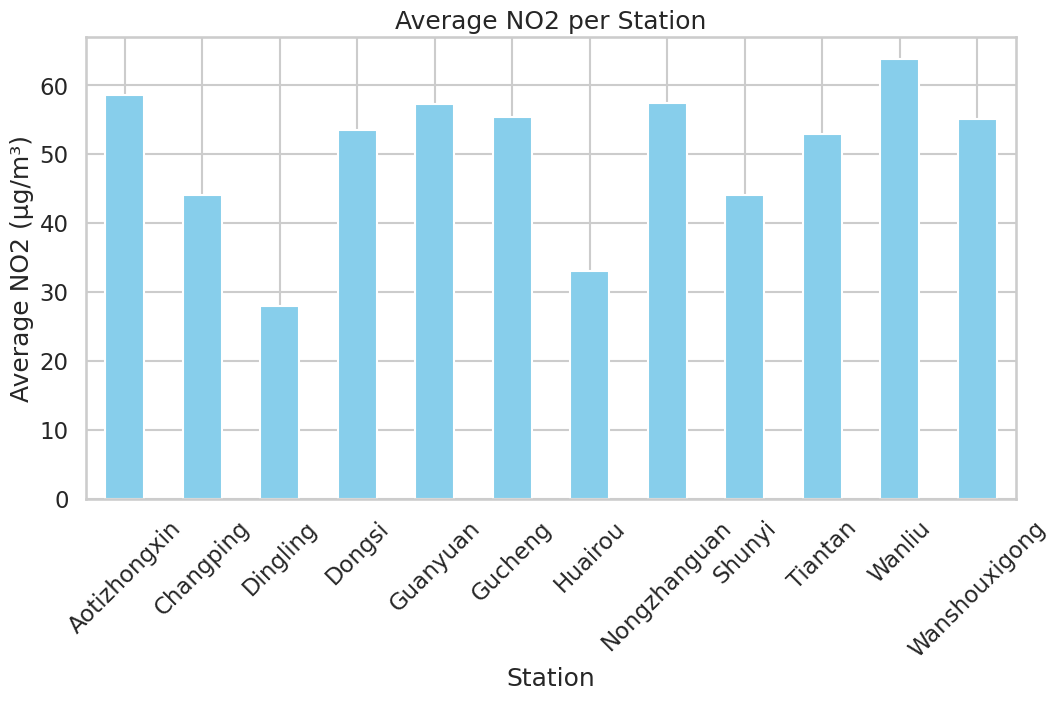

In [52]:
print("\n=== Average Measurements per Station ===")
print(station_summary["NO2"])

plt.figure(figsize=(12,6))
station_summary["NO2"].plot(kind='bar', color='skyblue')
plt.title("Average NO2 per Station")
plt.xlabel("Station")
plt.ylabel("Average NO2 (µg/m³)")
plt.xticks(rotation=45)
plt.show()

14. Memvisualisasikan Rata rata data dari Kolom O3 dari ke 12 Station, dimana Station yang memiliki nilai O3 tertinggi adalah Station Dingling.


=== Average Measurements per Station ===
station
Aotizhongxin     53.714746
Changping        56.393992
Dingling         66.631331
Dongsi           55.986678
Guanyuan         53.546721
Gucheng          55.943267
Huairou          58.213276
Nongzhanguan     56.683511
Shunyi           53.684712
Tiantan          54.060459
Wanliu           46.348683
Wanshouxigong    54.284505
Name: O3, dtype: float64


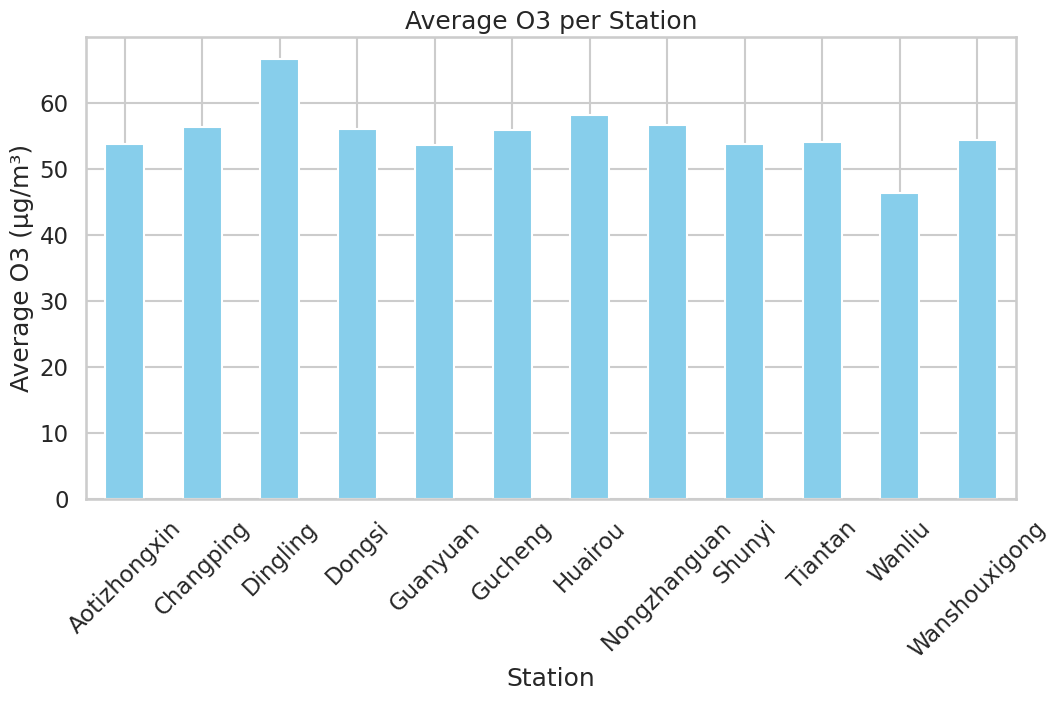

In [53]:
print("\n=== Average Measurements per Station ===")
print(station_summary["O3"])

plt.figure(figsize=(12,6))
station_summary["O3"].plot(kind='bar', color='skyblue')
plt.title("Average O3 per Station")
plt.xlabel("Station")
plt.ylabel("Average O3 (µg/m³)")
plt.xticks(rotation=45)
plt.show()

15. Memvisualisasikan Rata rata data dari Kolom TEMP dari ke 12 Station, dimana Station yang memiliki nilai TEMP tertinggi adalah Station Gucheng.


=== Average Measurements per Station ===
station
Aotizhongxin     13.581633
Changping        13.671654
Dingling         13.671654
Dongsi           13.668465
Guanyuan         13.581633
Gucheng          13.855635
Huairou          12.432950
Nongzhanguan     13.668465
Shunyi           13.376165
Tiantan          13.668465
Wanliu           13.425979
Wanshouxigong    13.781895
Name: TEMP, dtype: float64


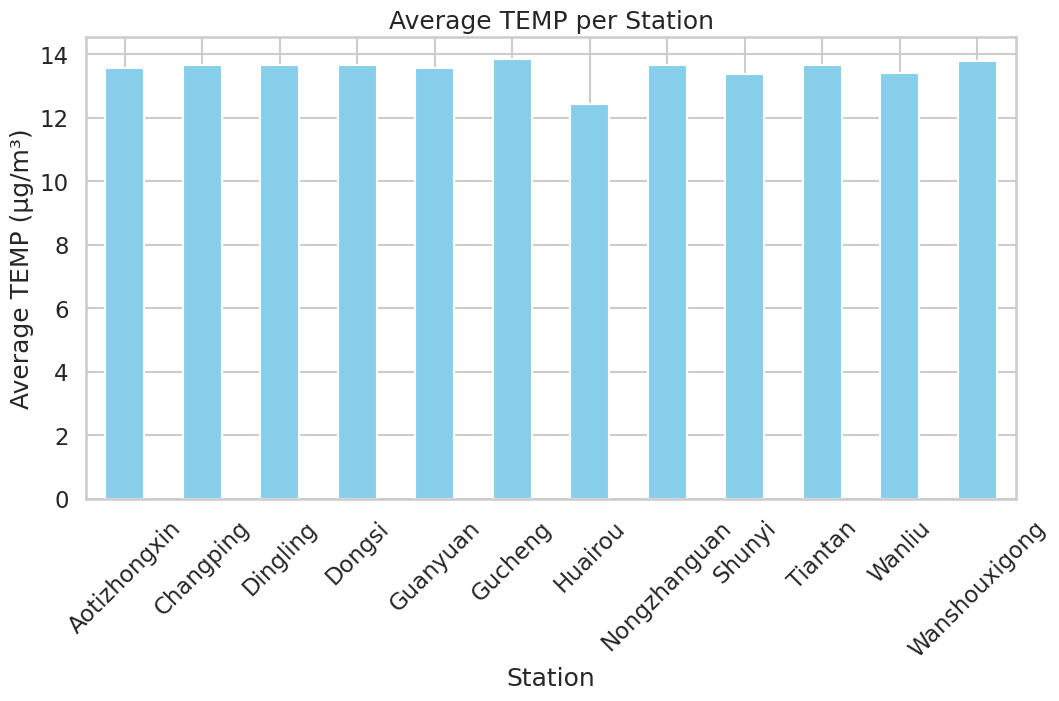

In [54]:
print("\n=== Average Measurements per Station ===")
print(station_summary["TEMP"])

plt.figure(figsize=(12,6))
station_summary["TEMP"].plot(kind='bar', color='skyblue')
plt.title("Average TEMP per Station")
plt.xlabel("Station")
plt.ylabel("Average TEMP (µg/m³)")
plt.xticks(rotation=45)
plt.show()

16. Memvisualisasikan Rata rata data dari Kolom PRES dari ke 12 Station, dimana Station yang memiliki nilai PRES tertinggi adalah Station Nongzhanguan dan Tiantan.


=== Average Measurements per Station ===
station
Aotizhongxin     1011.850074
Changping        1007.776689
Dingling         1007.776689
Dongsi           1012.550174
Guanyuan         1011.850074
Gucheng          1008.840551
Huairou          1007.617454
Nongzhanguan     1012.550174
Shunyi           1013.068469
Tiantan          1012.550174
Wanliu           1011.101118
Wanshouxigong    1011.514708
Name: PRES, dtype: float64


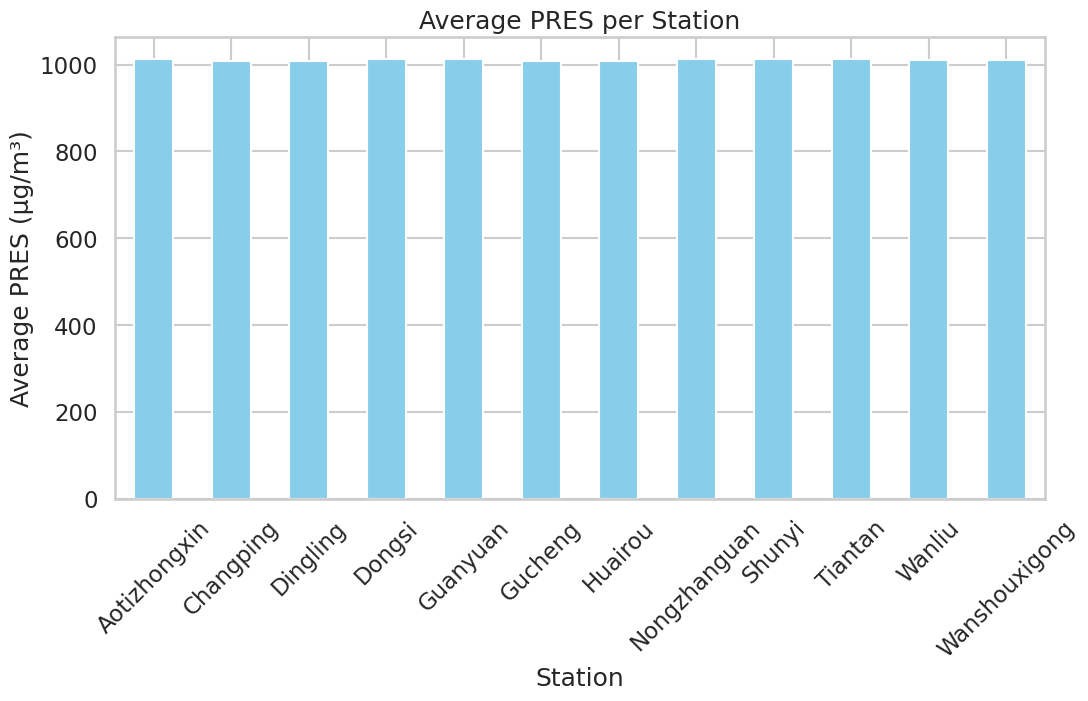

In [55]:
print("\n=== Average Measurements per Station ===")
print(station_summary["PRES"])

plt.figure(figsize=(12,6))
station_summary["PRES"].plot(kind='bar', color='skyblue')
plt.title("Average PRES per Station")
plt.xlabel("Station")
plt.ylabel("Average PRES (µg/m³)")
plt.xticks(rotation=45)
plt.show()

17. Memvisualisasikan Rata rata data dari Kolom DEWP dari ke 12 Station, dimana Station yang memiliki nilai DEWP tertinggi adalah Station Wanliu.


=== Average Measurements per Station ===
station
Aotizhongxin     3.119889
Changping        1.488786
Dingling         1.488786
Dongsi           2.444747
Guanyuan         3.119889
Gucheng          2.600037
Huairou          2.220736
Nongzhanguan     2.444747
Shunyi           2.451201
Tiantan          2.444747
Wanliu           3.263333
Wanshouxigong    2.705162
Name: DEWP, dtype: float64


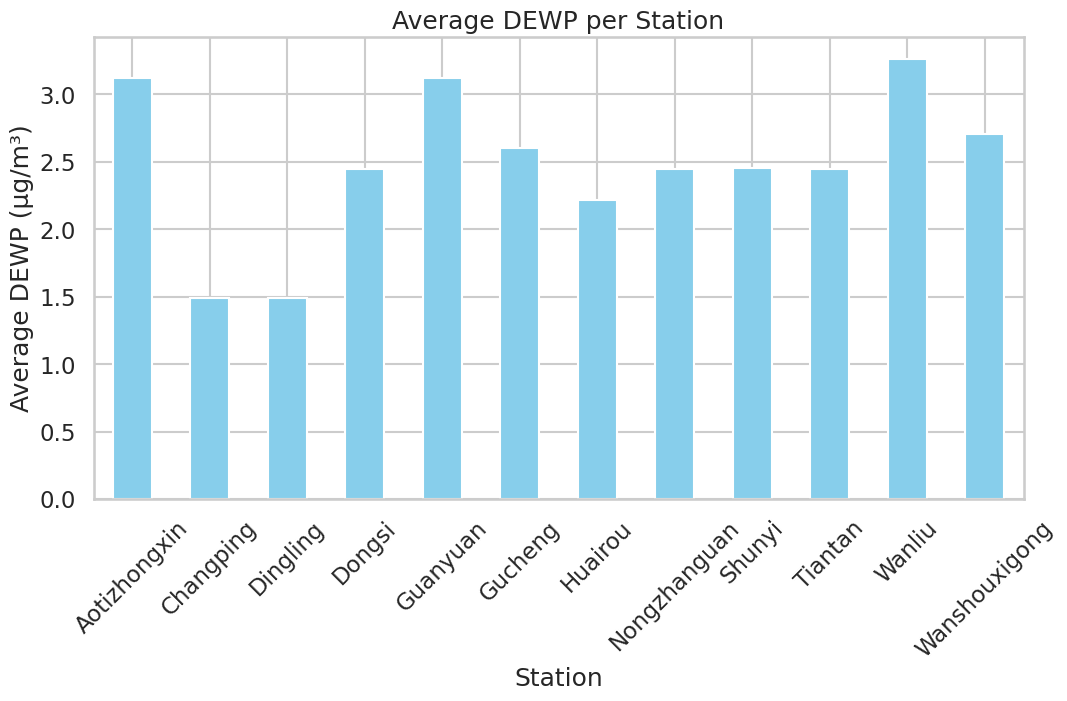

In [56]:
print("\n=== Average Measurements per Station ===")
print(station_summary["DEWP"])

plt.figure(figsize=(12,6))
station_summary["DEWP"].plot(kind='bar', color='skyblue')
plt.title("Average DEWP per Station")
plt.xlabel("Station")
plt.ylabel("Average DEWP (µg/m³)")
plt.xticks(rotation=45)
plt.show()

18. Memvisualisasikan Rata rata data dari Kolom RAIN dari ke 12 Station, dimana Station yang memiliki nilai RAIN tertinggi adalah Station Wanliu.


=== Average Measurements per Station ===
station
Aotizhongxin     0.025251
Changping        0.024431
Dingling         0.024431
Dongsi           0.025228
Guanyuan         0.025251
Gucheng          0.024533
Huairou          0.025938
Nongzhanguan     0.025228
Shunyi           0.023772
Tiantan          0.025228
Wanliu           0.025950
Wanshouxigong    0.025059
Name: RAIN, dtype: float64


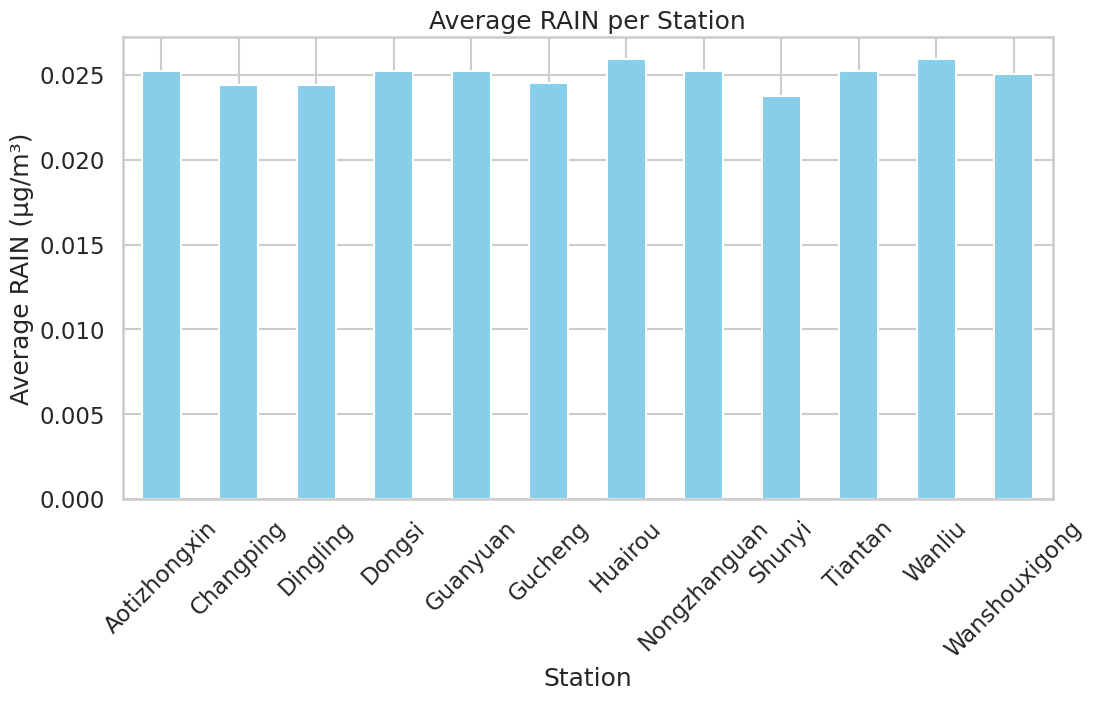

In [57]:
print("\n=== Average Measurements per Station ===")
print(station_summary["RAIN"])

plt.figure(figsize=(12,6))
station_summary["RAIN"].plot(kind='bar', color='skyblue')
plt.title("Average RAIN per Station")
plt.xlabel("Station")
plt.ylabel("Average RAIN (µg/m³)")
plt.xticks(rotation=45)
plt.show()

19. Memvisualisasikan Rata rata data dari Kolom WSPM dari ke 12 Station, dimana Station yang memiliki nilai WSPM tertinggi adalah Station Dongsi, Nongzhanguan dan Tiantan.


=== Average Measurements per Station ===
station
Aotizhongxin     1.662738
Changping        1.769057
Dingling         1.769057
Dongsi           1.788548
Guanyuan         1.662738
Gucheng          1.307511
Huairou          1.589337
Nongzhanguan     1.788548
Shunyi           1.729629
Tiantan          1.788548
Wanliu           1.475108
Wanshouxigong    1.692776
Name: WSPM, dtype: float64


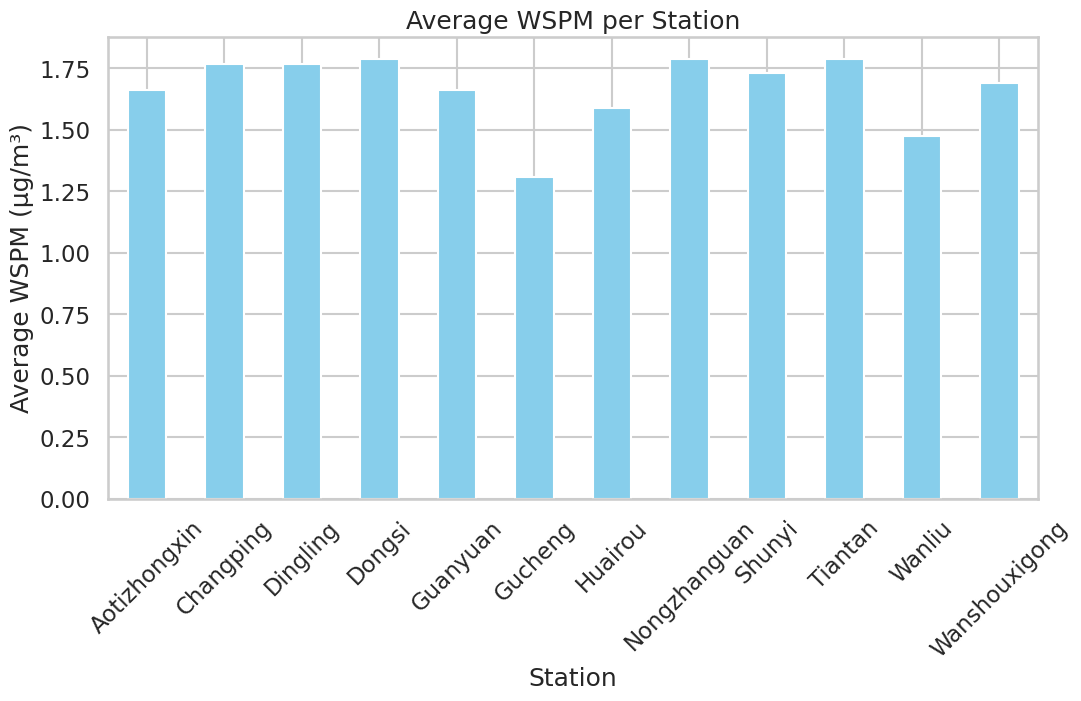

In [59]:
print("\n=== Average Measurements per Station ===")
print(station_summary["WSPM"])

plt.figure(figsize=(12,6))
station_summary["WSPM"].plot(kind='bar', color='skyblue')
plt.title("Average WSPM per Station")
plt.xlabel("Station")
plt.ylabel("Average WSPM (µg/m³)")
plt.xticks(rotation=45)
plt.show()

**Insight:**
- Dataset yang dibersihkan sudah tidak memiliki missing value bisa dilihat dari method .info() yang semua kolomnya memiliki nilai 420768.
- Analisis Deskriptif menunjukan dataset yang clean dimana nilai dari min mean dan max tidak terlalu ekstrim, tapi ada 1 kolom yaitu RAIN, mungkin karena persebaran datanya sangatlah ekstrim meski itu valid.
- Hasil visualisasi histogram menunjukan banyak data yang left skewed distribution seperti kolom PM2.5, PM10, SO2, NO2, CO, O3 dan WSPM. Pada data lainnya menunjukan Symetric Distribution seperti kolom TEMP dan PRES. Sedangkan kolom DEWP masuk ke kategori Right Distribution dan yang terakhir kolom RAIN mungkin masuk kedalam left skewed distribution karena persebaran datanya tidak seimbang.
- Hasil dari korelasi menunjukan Bahwa kolom PM2.5, PM10, SO2, NO2 dan CO memiliki korelasi karena nilainya hampir mendekati 1. Lalu kolom kolom lainnya yang berkorelasi adalah kolom 03 dengan TEMP, DEWP dam WSPM.
- Dari hasil visualisai tren PM2.5 dengan line cart, adanya penurunan PM2.5 dari tahun 2015 bulan Juli sampai tahun 2016 bulan Januari.
- Dari hasil visualisasi rata rata pengukuran nilai dari setiap features adalah sebagai berikut:

| Kolom | MIN (Stasiun)              | MAX (Stasiun)                          | Keterangan                                                                                                                           |
|-------|----------------------------|----------------------------------------|---------------------------------------------------------------------------------------------------------------------------------------|
| PM2.5 | Dingling                   | Dongsi                                 | Karena Dingling memiliki PM2.5 terendah, udara di sana cenderung lebih bersih. Sementara Dongsi dengan PM2.5 tertinggi menandakan polusi lebih tinggi.                      |
| PM10  | Dingling                   | Gucheng                                | Karena Dingling memiliki PM10 terendah, partikel debu/partikulat kasar di udara relatif sedikit. Gucheng dengan PM10 tertinggi menunjukkan lebih banyak partikel kasar.     |
| SO2   | Huariou                    | Dongsi                                 | Karena Huariou memiliki SO2 terendah, potensi pencemaran sulfur relatif kecil. Dongsi dengan SO2 tertinggi menunjukkan potensi sumber emisi sulfur lebih besar.             |
| NO2   | Dingling                   | Wanliu                                | Karena Dingling memiliki NO2 terendah, emisi kendaraan/industri pembakar bahan bakar fosil di sana cenderung lebih rendah. Wanliu memiliki NO2 tertinggi, menandakan emisi tinggi. |
| O3    | Wanliu                     | Dingling                              | Karena Wanliu memiliki O3 terendah, potensi oksidan  relatif rendah. Dingling dengan O3 tertinggi menandakan pembentukan ozon permukaan yang lebih tinggi.         |
| TEMP  | Huariou                    | Gucheng                               | Karena Huariou memiliki suhu (TEMP) terendah, wilayah ini cenderung lebih dingin. Gucheng dengan suhu tertinggi menunjukkan kondisi lebih hangat.                          |
| PRES  | Huariou                    | Nongzhanguan & Tiantan                | Karena Huariou memiliki tekanan (PRES) terendah, wilayah ini cenderung memiliki tekanan udara rendah. Nongzhanguan & Tiantan memiliki tekanan tertinggi.                     |
| DEWP  | Changping & Dingling       | Wanliu                                | Karena Changping & Dingling memiliki titik embun (DEWP) terendah, udaranya lebih kering. Wanliu dengan DEWP tertinggi menunjukkan kelembapan yang lebih tinggi.             |
| RAIN  | Shunyi                     | Wanliu                                | Karena Shunyi memiliki curah hujan (RAIN) terendah, wilayah ini cenderung lebih kering. Wanliu dengan curah hujan tertinggi menunjukkan intensitas hujan lebih besar.       |
| WSPM  | Gucheng                    | Dongsi & Nongzhanguan & Tiantan       | Karena Gucheng memiliki kecepatan angin (WSPM) terendah, angin cenderung lebih tenang. Dongsi, Nongzhanguan & Tiantan memiliki angin lebih kencang.                         |



## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimanakah tren dari kualitas udara (PM2.5 & PM10)?

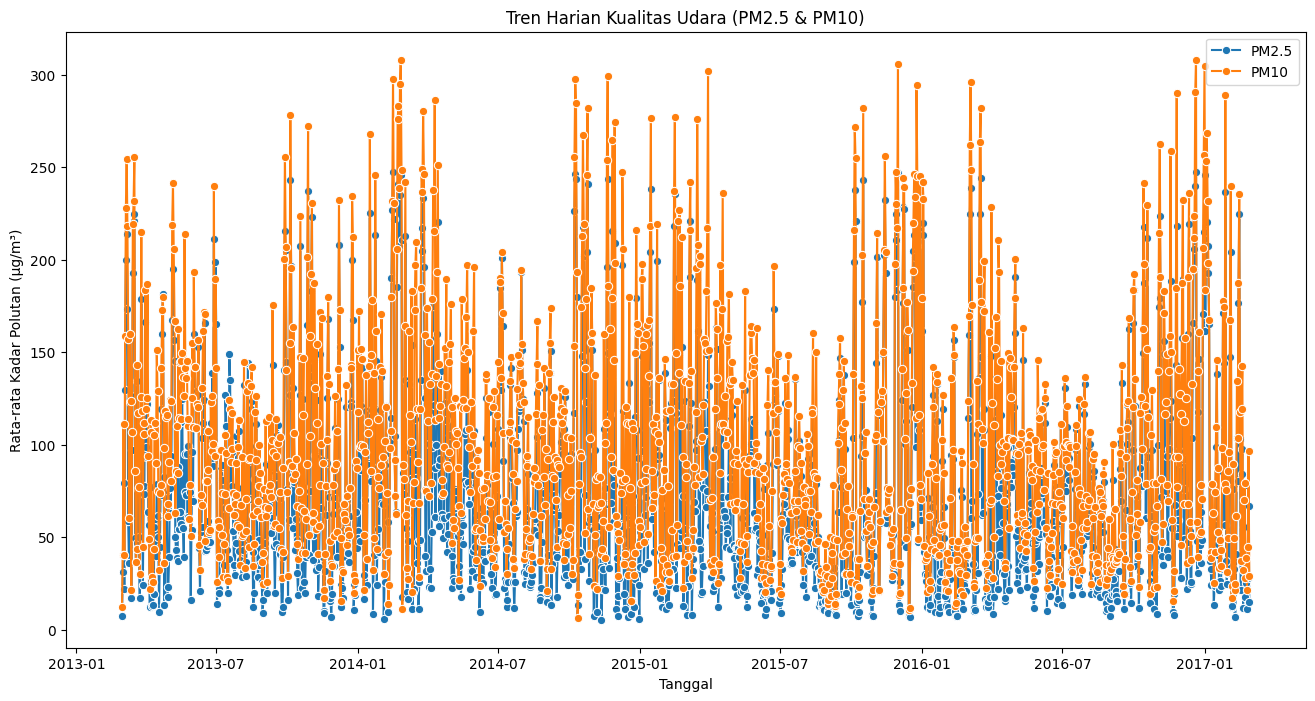

In [3]:
# Konversi kolom tanggal
df['datetime'] = pd.to_datetime(df[['year', 'month', 'day']])

# Kelompokkan data berdasarkan tanggal (harian)
df_daily = df.groupby('datetime')[['PM2.5', 'PM10']].mean().reset_index()

# Plot tren harian kualitas udara
plt.figure(figsize=(16, 8))

sns.lineplot(data=df_daily, x='datetime', y='PM2.5', label='PM2.5', marker='o')
sns.lineplot(data=df_daily, x='datetime', y='PM10', label='PM10', marker='o')

plt.xlabel("Tanggal")
plt.ylabel("Rata-rata Kadar Polutan (µg/m³)")
plt.title("Tren Harian Kualitas Udara (PM2.5 & PM10)")
plt.legend()
plt.show()

### Pertanyaan 2: Bagaimanakah Distribusi dari polutan utama yaitu PM2.5 dan PM10?

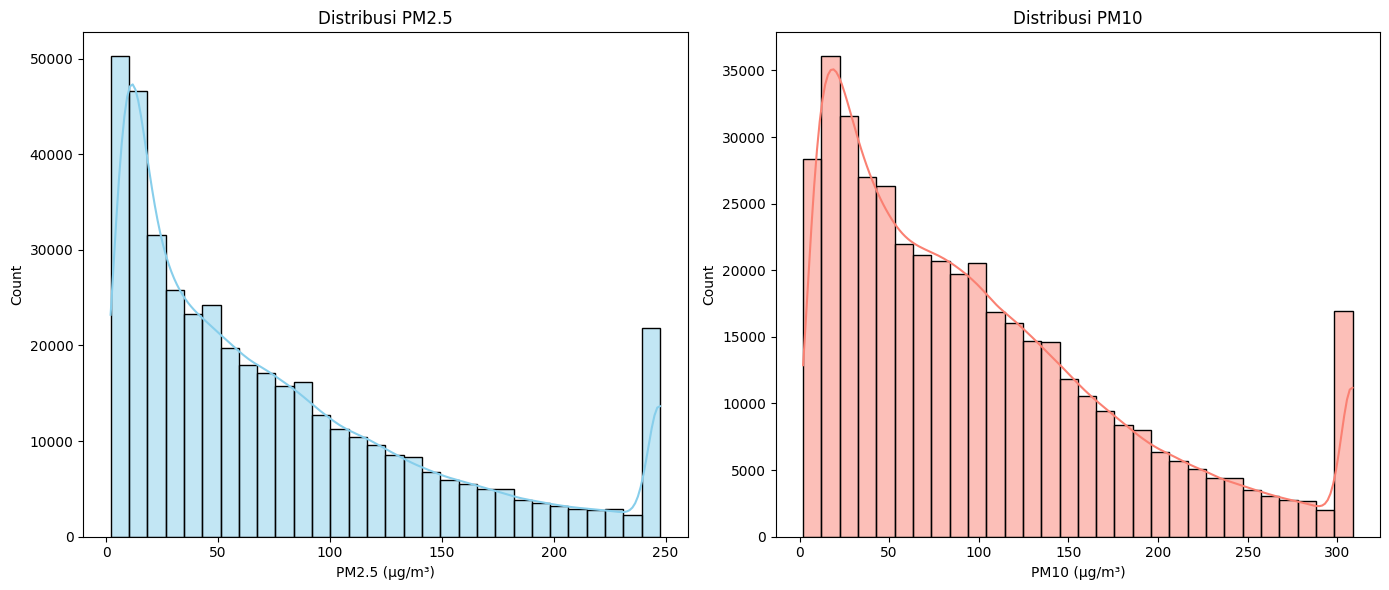

In [45]:
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
sns.histplot(df['PM2.5'], kde=True, bins=30, color='skyblue')
plt.title("Distribusi PM2.5")
plt.xlabel("PM2.5 (µg/m³)")

plt.subplot(1,2,2)
sns.histplot(df['PM10'], kde=True, bins=30, color='salmon')
plt.title("Distribusi PM10")
plt.xlabel("PM10 (µg/m³)")

plt.tight_layout()
plt.show()

### Pertanyaan 3: Bagaiamanakah Pengaruh dari  Suhu, Kelembapan dan Kondisi Cuaca terhadap dari kadar polutan utama (PM2.5 dan PM10)?

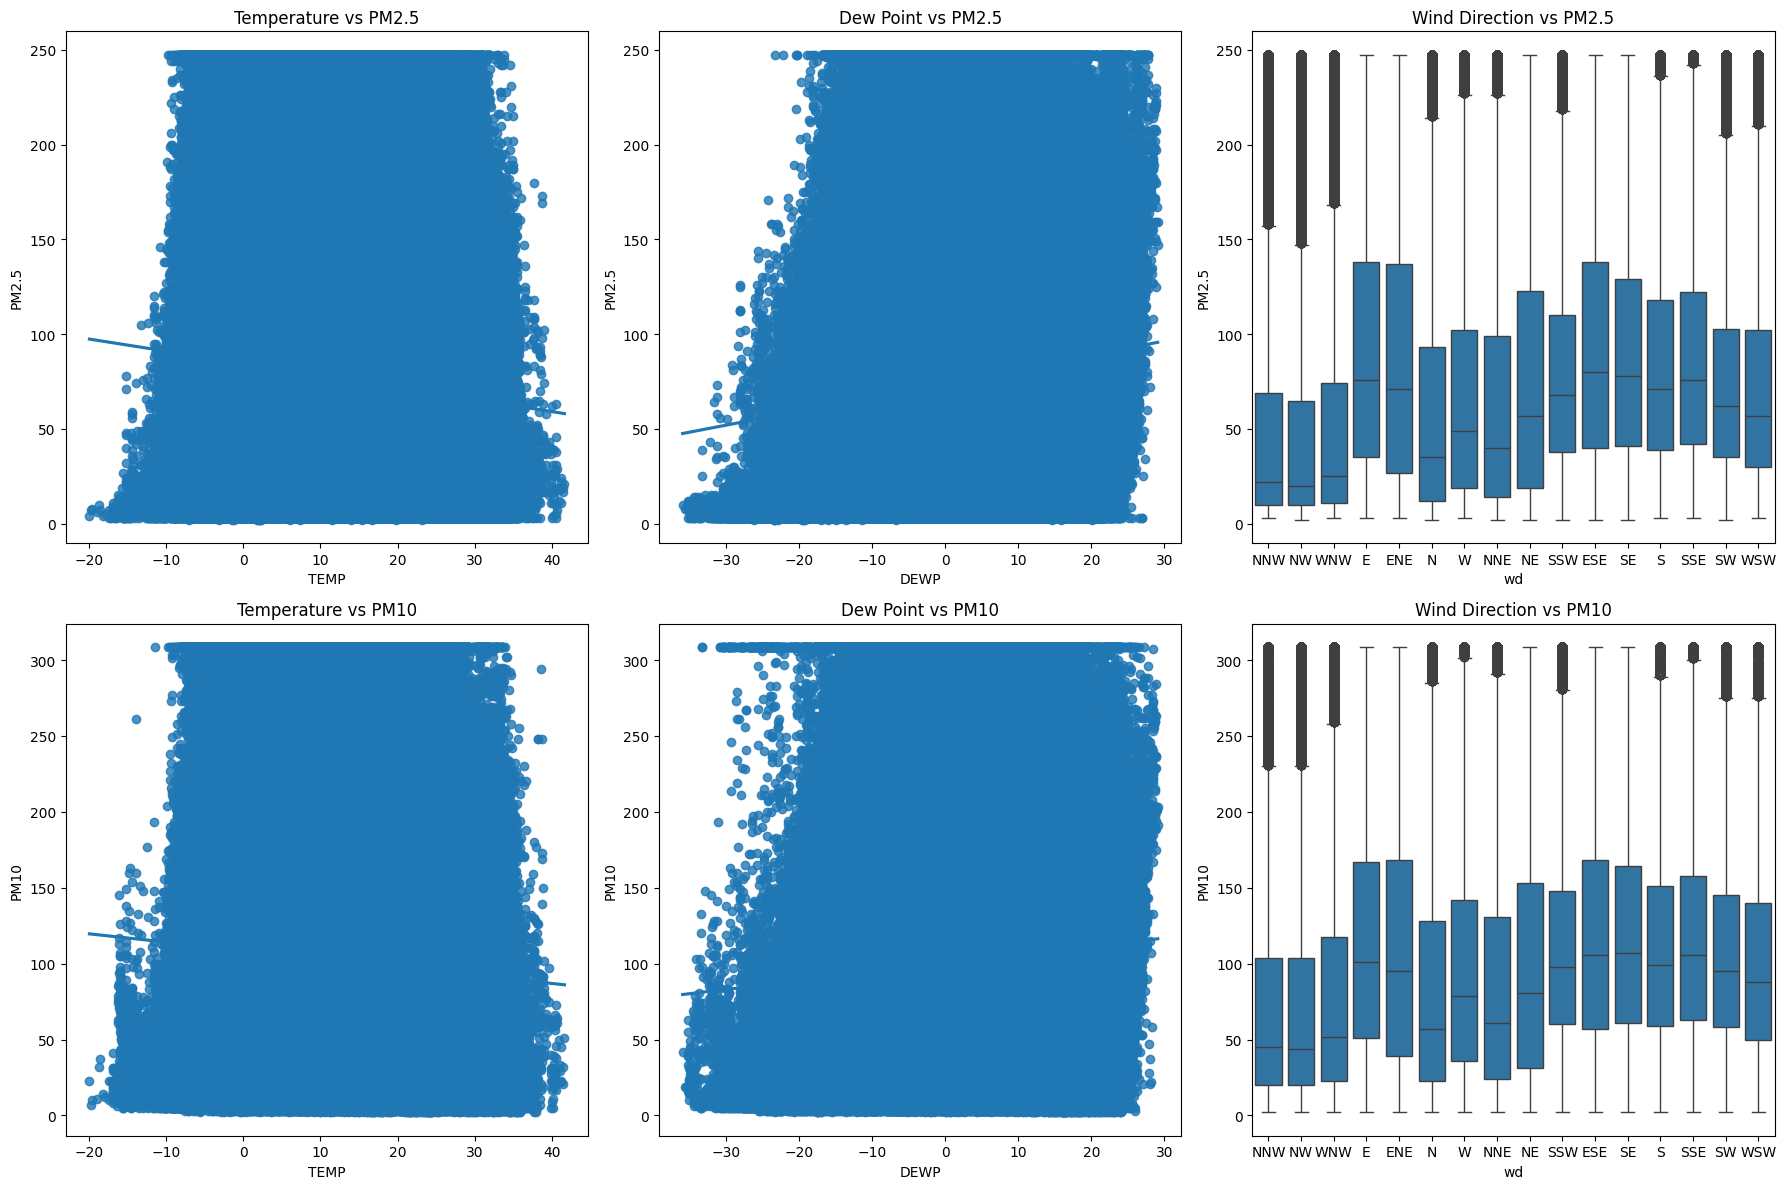

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(18,12))

sns.regplot(x='TEMP', y='PM2.5', data=df, ax=axes[0,0])
axes[0,0].set_title("Temperature vs PM2.5")
sns.regplot(x='TEMP', y='PM10', data=df, ax=axes[1,0])
axes[1,0].set_title("Temperature vs PM10")

sns.regplot(x='DEWP', y='PM2.5', data=df, ax=axes[0,1])
axes[0,1].set_title("Dew Point vs PM2.5")
sns.regplot(x='DEWP', y='PM10', data=df, ax=axes[1,1])
axes[1,1].set_title("Dew Point vs PM10")

sns.boxplot(x='wd', y='PM2.5', data=df, ax=axes[0,2])
axes[0,2].set_title("Wind Direction vs PM2.5")
sns.boxplot(x='wd', y='PM10', data=df, ax=axes[1,2])
axes[1,2].set_title("Wind Direction vs PM10")

plt.tight_layout()
plt.show()

### Pertanyaan 4: Bagaimanakah perbedaan kualitas udara dari ke 12 station?

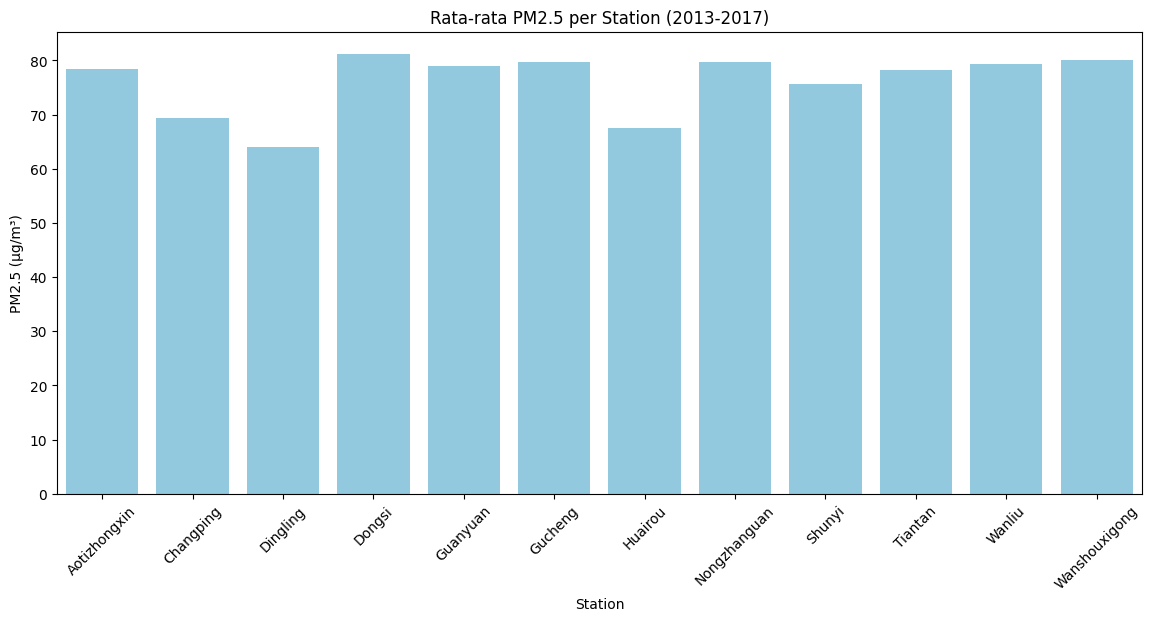

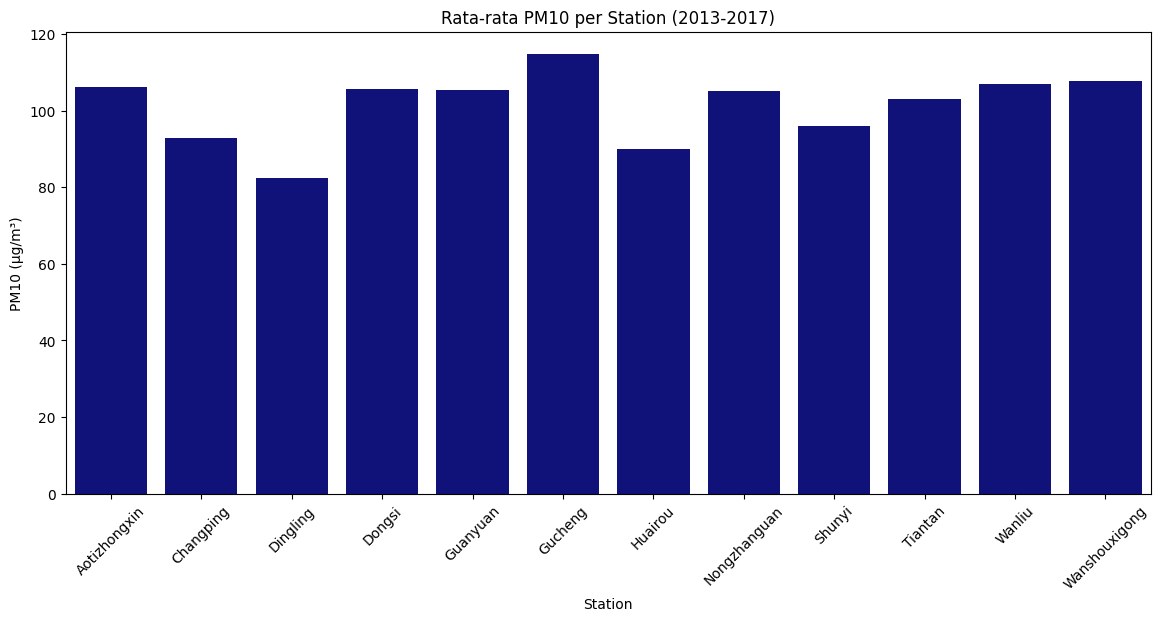

In [55]:
df_station = df.groupby('station')[['PM2.5', 'PM10']].mean().reset_index()

plt.figure(figsize=(14,6))
sns.barplot(data=df_station, x='station', y='PM2.5', color='skyblue')
plt.title("Rata-rata PM2.5 per Station (2013-2017)")
plt.xlabel("Station")
plt.ylabel("PM2.5 (µg/m³)")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(14,6))
sns.barplot(data=df_station, x='station', y='PM10', color='darkblue')
plt.title("Rata-rata PM10 per Station (2013-2017)")
plt.xlabel("Station")
plt.ylabel("PM10 (µg/m³)")
plt.xticks(rotation=45)
plt.show()

### Pertanyaan 5: Apakah ada perbedaan kualitas udara pada hari kerja dan hari libur?

/tmp/ipykernel_54406/2445141053.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='day_type', y='PM2.5', data=avg_pm25, palette='Reds')


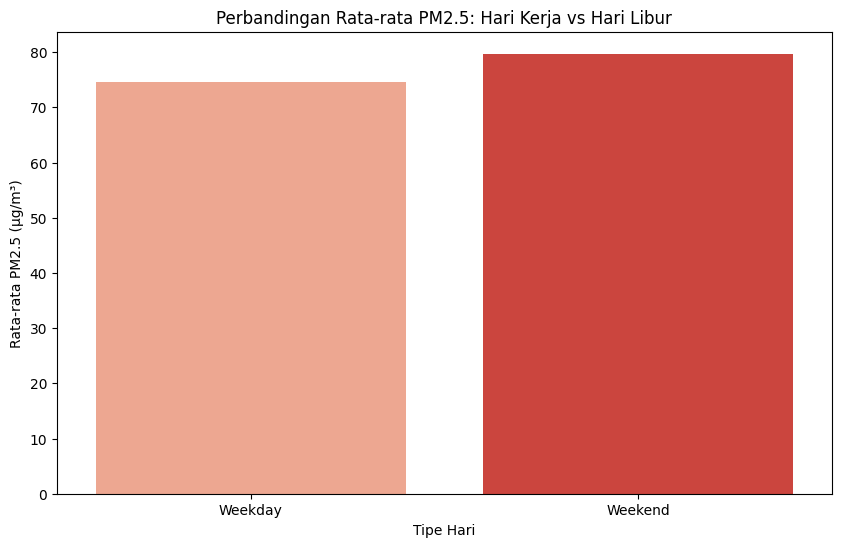

In [6]:
df['weekday'] = df['datetime'].dt.weekday
df['day_type'] = df['weekday'].apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')

avg_pm25 = df.groupby('day_type')['PM2.5'].mean().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(x='day_type', y='PM2.5', data=avg_pm25, palette='Reds')
plt.title("Perbandingan Rata-rata PM2.5: Hari Kerja vs Hari Libur")
plt.xlabel("Tipe Hari")
plt.ylabel("Rata-rata PM2.5 (µg/m³)")
plt.show()

### Pertanyaan 6: Bagaimanakan pola pencemaran udara dalam sehari?

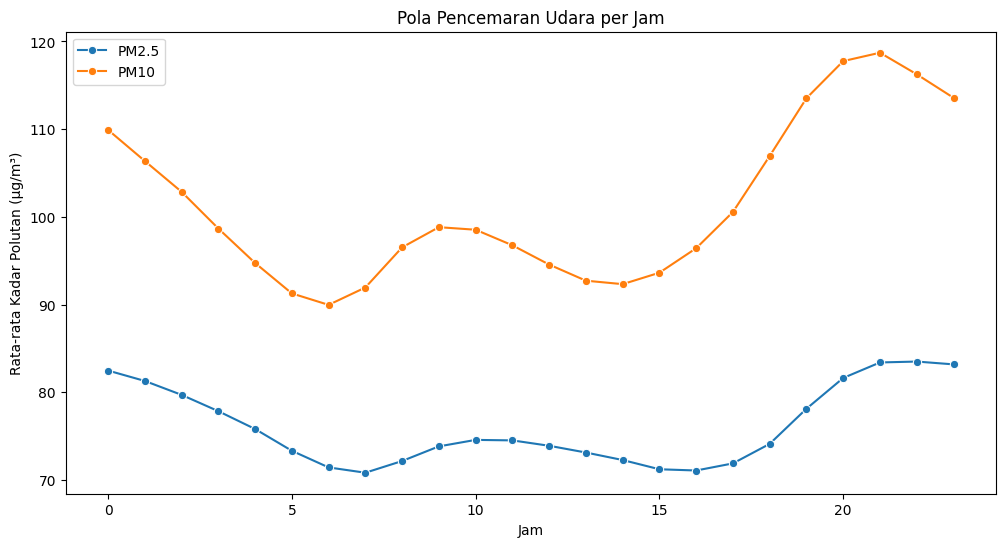

In [59]:
df['hour'] = df['datetime'].dt.hour
df_hourly = df.groupby('hour')[['PM2.5', 'PM10']].mean().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(data=df_hourly, x='hour', y='PM2.5', marker='o', label='PM2.5')
sns.lineplot(data=df_hourly, x='hour', y='PM10', marker='o', label='PM10')
plt.title("Pola Pencemaran Udara per Jam")
plt.xlabel("Jam")
plt.ylabel("Rata-rata Kadar Polutan (µg/m³)")
plt.legend()
plt.show()

### Pertanyaan 7: Dimanakah area yang kualitas udaranya paling buruk?

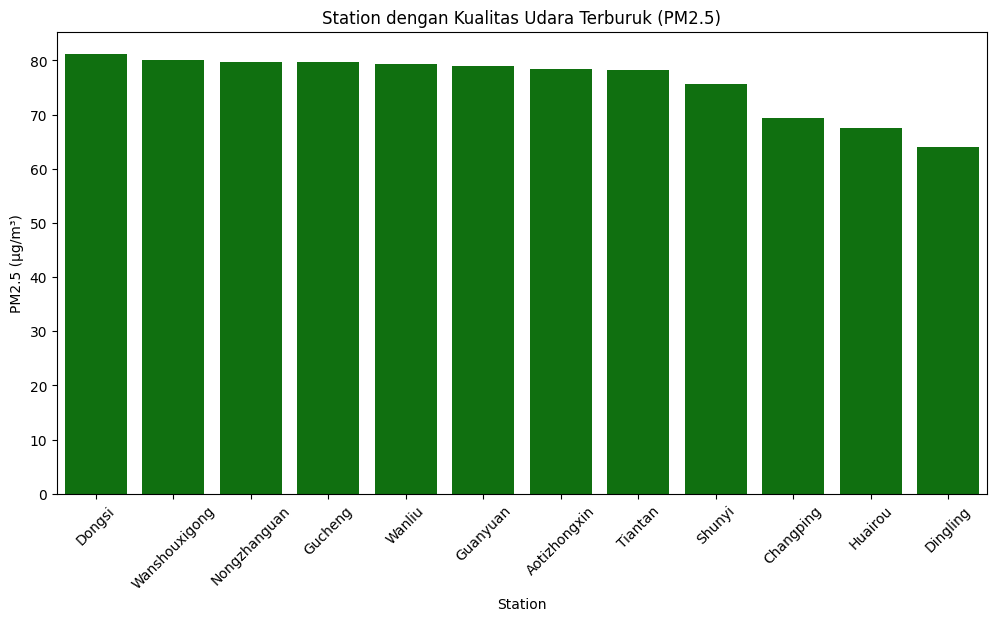

In [61]:
df_station_pm25 = df.groupby('station')[['PM2.5']].mean().reset_index()
worst_station = df_station_pm25.sort_values(by='PM2.5', ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(data=worst_station, x='station', y='PM2.5', color='green')
plt.title("Station dengan Kualitas Udara Terburuk (PM2.5)")
plt.xlabel("Station")
plt.ylabel("PM2.5 (µg/m³)")
plt.xticks(rotation=45)
plt.show()

### Pertanyaan 8: Kapan waktu terbaik dalam melakukan aktifitas diluar rumah untuk mendapatkan udara yang bersih?

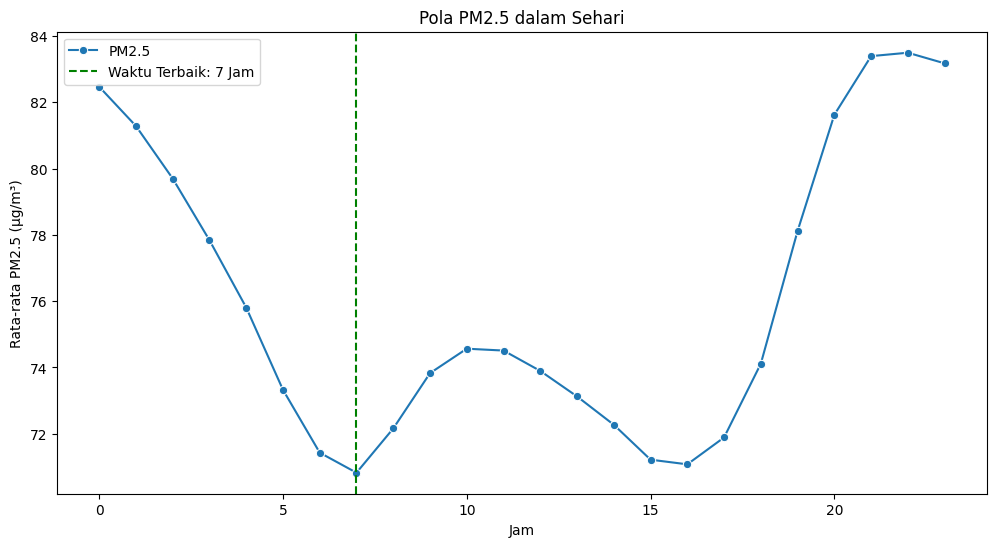

In [63]:
best_hour = df_hourly.loc[df_hourly['PM2.5'].idxmin(), 'hour']

plt.figure(figsize=(12,6))
sns.lineplot(data=df_hourly, x='hour', y='PM2.5', marker='o', label='PM2.5')
plt.axvline(x=best_hour, color='green', linestyle='--', label=f'Waktu Terbaik: {best_hour} Jam')
plt.title("Pola PM2.5 dalam Sehari")
plt.xlabel("Jam")
plt.ylabel("Rata-rata PM2.5 (µg/m³)")
plt.legend()
plt.show()

### Pertanyaan 9: Apakah ada sebuah hari dalam seminggu yang udaranya paling kotor?

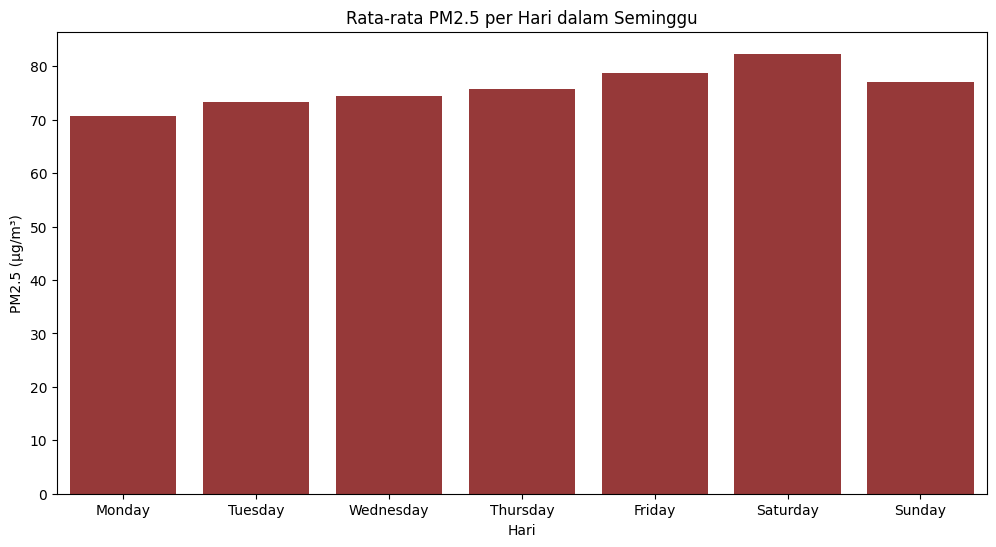

In [70]:
df['day_name'] = df['datetime'].dt.day_name()
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_day = df.groupby('day_name')['PM2.5'].mean().reset_index()
df_day['day_name'] = pd.Categorical(df_day['day_name'], categories=order, ordered=True)
df_day = df_day.sort_values('day_name')

plt.figure(figsize=(12,6))
sns.barplot(data=df_day, x='day_name', y='PM2.5', color='brown')
plt.title("Rata-rata PM2.5 per Hari dalam Seminggu")
plt.xlabel("Hari")
plt.ylabel("PM2.5 (µg/m³)")
plt.show()

**Insight:**
- Pertanyaan 1 : Berdasarkan analisis dari tren kualitas udara selama kurun waktu 2013-2017, data menunjukan PM2.5 dan PM10 berada pada puncaknya pada tahun 2014 yang kemudian pengalami penurunan hingga mencapai titik terendah pada tahun 2016 yang kemudian naik lagi pada tahun 2017.
- Pertanyaan 2 : Berasarkan dari visualisasi, PM2.5 dan PM10 itu cenderung memiliki sebaran yang tidak merata atau right skewed distribution yang artinya besar dari nilai polutan berada pada rentang yang sangat rendah, naum terdapat ekor distribusi panjang yang menunjukan bahwa meski mayoritas kondisi udara tergolong rendah ada beberapa periode atau episode tertentu yang mengalami lonjakan.
- Pertanyaan 3 : Berdasarkan hasil visualisasi, suhu (TEMP) dan kelembapan (DEWP) berpengaruh dalam skala kecil terhadap PM2.5 dan PM10, dimana adanya kenaikan suhu atau kelembapan itu sedikit menurunkan kadar polutan.
- Pertanyaan 4 : Berdasarkan hasil dari visualisasi, beberapa station misalnya wainlu cenderung memiliki kadar PM2.5 lebih tinggi, sedangkan station lain misalnya Changping dan Huairou relatif lebih rendah dan Station dengan nilai PM2.5 Tertinggi ialah station Dongsi. Sementara itu untuk PM10 nilai tertingginya berada pada station Gucheng dan yang terendah berada pada Dingling.
- Pertanyaan 5 : Berdasarkan hasil visualisasi, terdapat hal menarik dimana nilai dari PM2.5 justru lebih rendah pada weekday dari pada weekend, dari hasil ini diperlukan analisis lebih lanjut untuk memahami faktor lain kenapa hasil ini bisa terjadi.
- Pertanyaan 6 : Berdasarkan hasil visualisasi, PM10 secara umum jauh lebih tinggi daripada PM2.5 sepanjang hari. Kedua parameter itu menunjukan adanya penurunan pada pagi hari hingga siang hari, tapi adanya kelonjakan dimalam hari.
- Pertanyaan 7 : Berdasarkan hasil visualisasi, rata rata PM2.5 menempati posisi tertinggi pada station Dongsi yang diikuti staion Wanshouxigong dan Nongzhanguan.
- Pertanyaan 8 : Berdasarkan hasil visualisasi, PM2.5 cenderung rendah pada pukul 7 pagi dan meningkat saat siang dan menurun saat sore dan meningkat drastis pada malam hari.
- Pertanyaan 9 : Berdasarkan hasil visualisasi, hari dengan udara terkotor adalah hari sabtu, diikuti dengan hari kamis dan jumat.

## Analisis Lanjutan (Opsional)

Berdasarkan visualisasi sebaran data, terlihat bahwa nilai PM2.5 dan PM10 sebagian besar berada pada kelas “Baik” hingga “Sedang”, meskipun ada beberapa data yang masuk dalam kategori “Tidak Sehat” hingga “Sangat Tidak Sehat”. Untuk variabel lain seperti suhu (TEMP), tekanan atmosfer (PRES), dan kelembaban (DEWP), sebaran data cukup merata antar kelas “Rendah”, “Sedang”, “Tinggi”, dan “Sangat Tinggi”. Namun , untuk curah hujan (RAIN), sebagian besar data terkonsentrasi dalam kelas "Rendah", yang menunjukkan kondisi dominan cuaca kering yang lebih umum terdapat dalam kumpulan data. Polutan seperti CO, SO2, NO2, dan O3 juga sebagian besar masuk dalam kategori “Rendah”, yang menunjukkan bahwa polusi udara secara keseluruhan masih dalam batas aman, meskipun ada beberapa kasus dengan konsentrasi yang lebih besar.

/tmp/ipykernel_93029/365587611.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette="coolwarm", ax=axes[i])
/tmp/ipykernel_93029/365587611.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette="coolwarm", ax=axes[i])
/tmp/ipykernel_93029/365587611.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette="coolwarm", ax=axes[i])
/tmp/ipykernel_93029/365587611.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. As

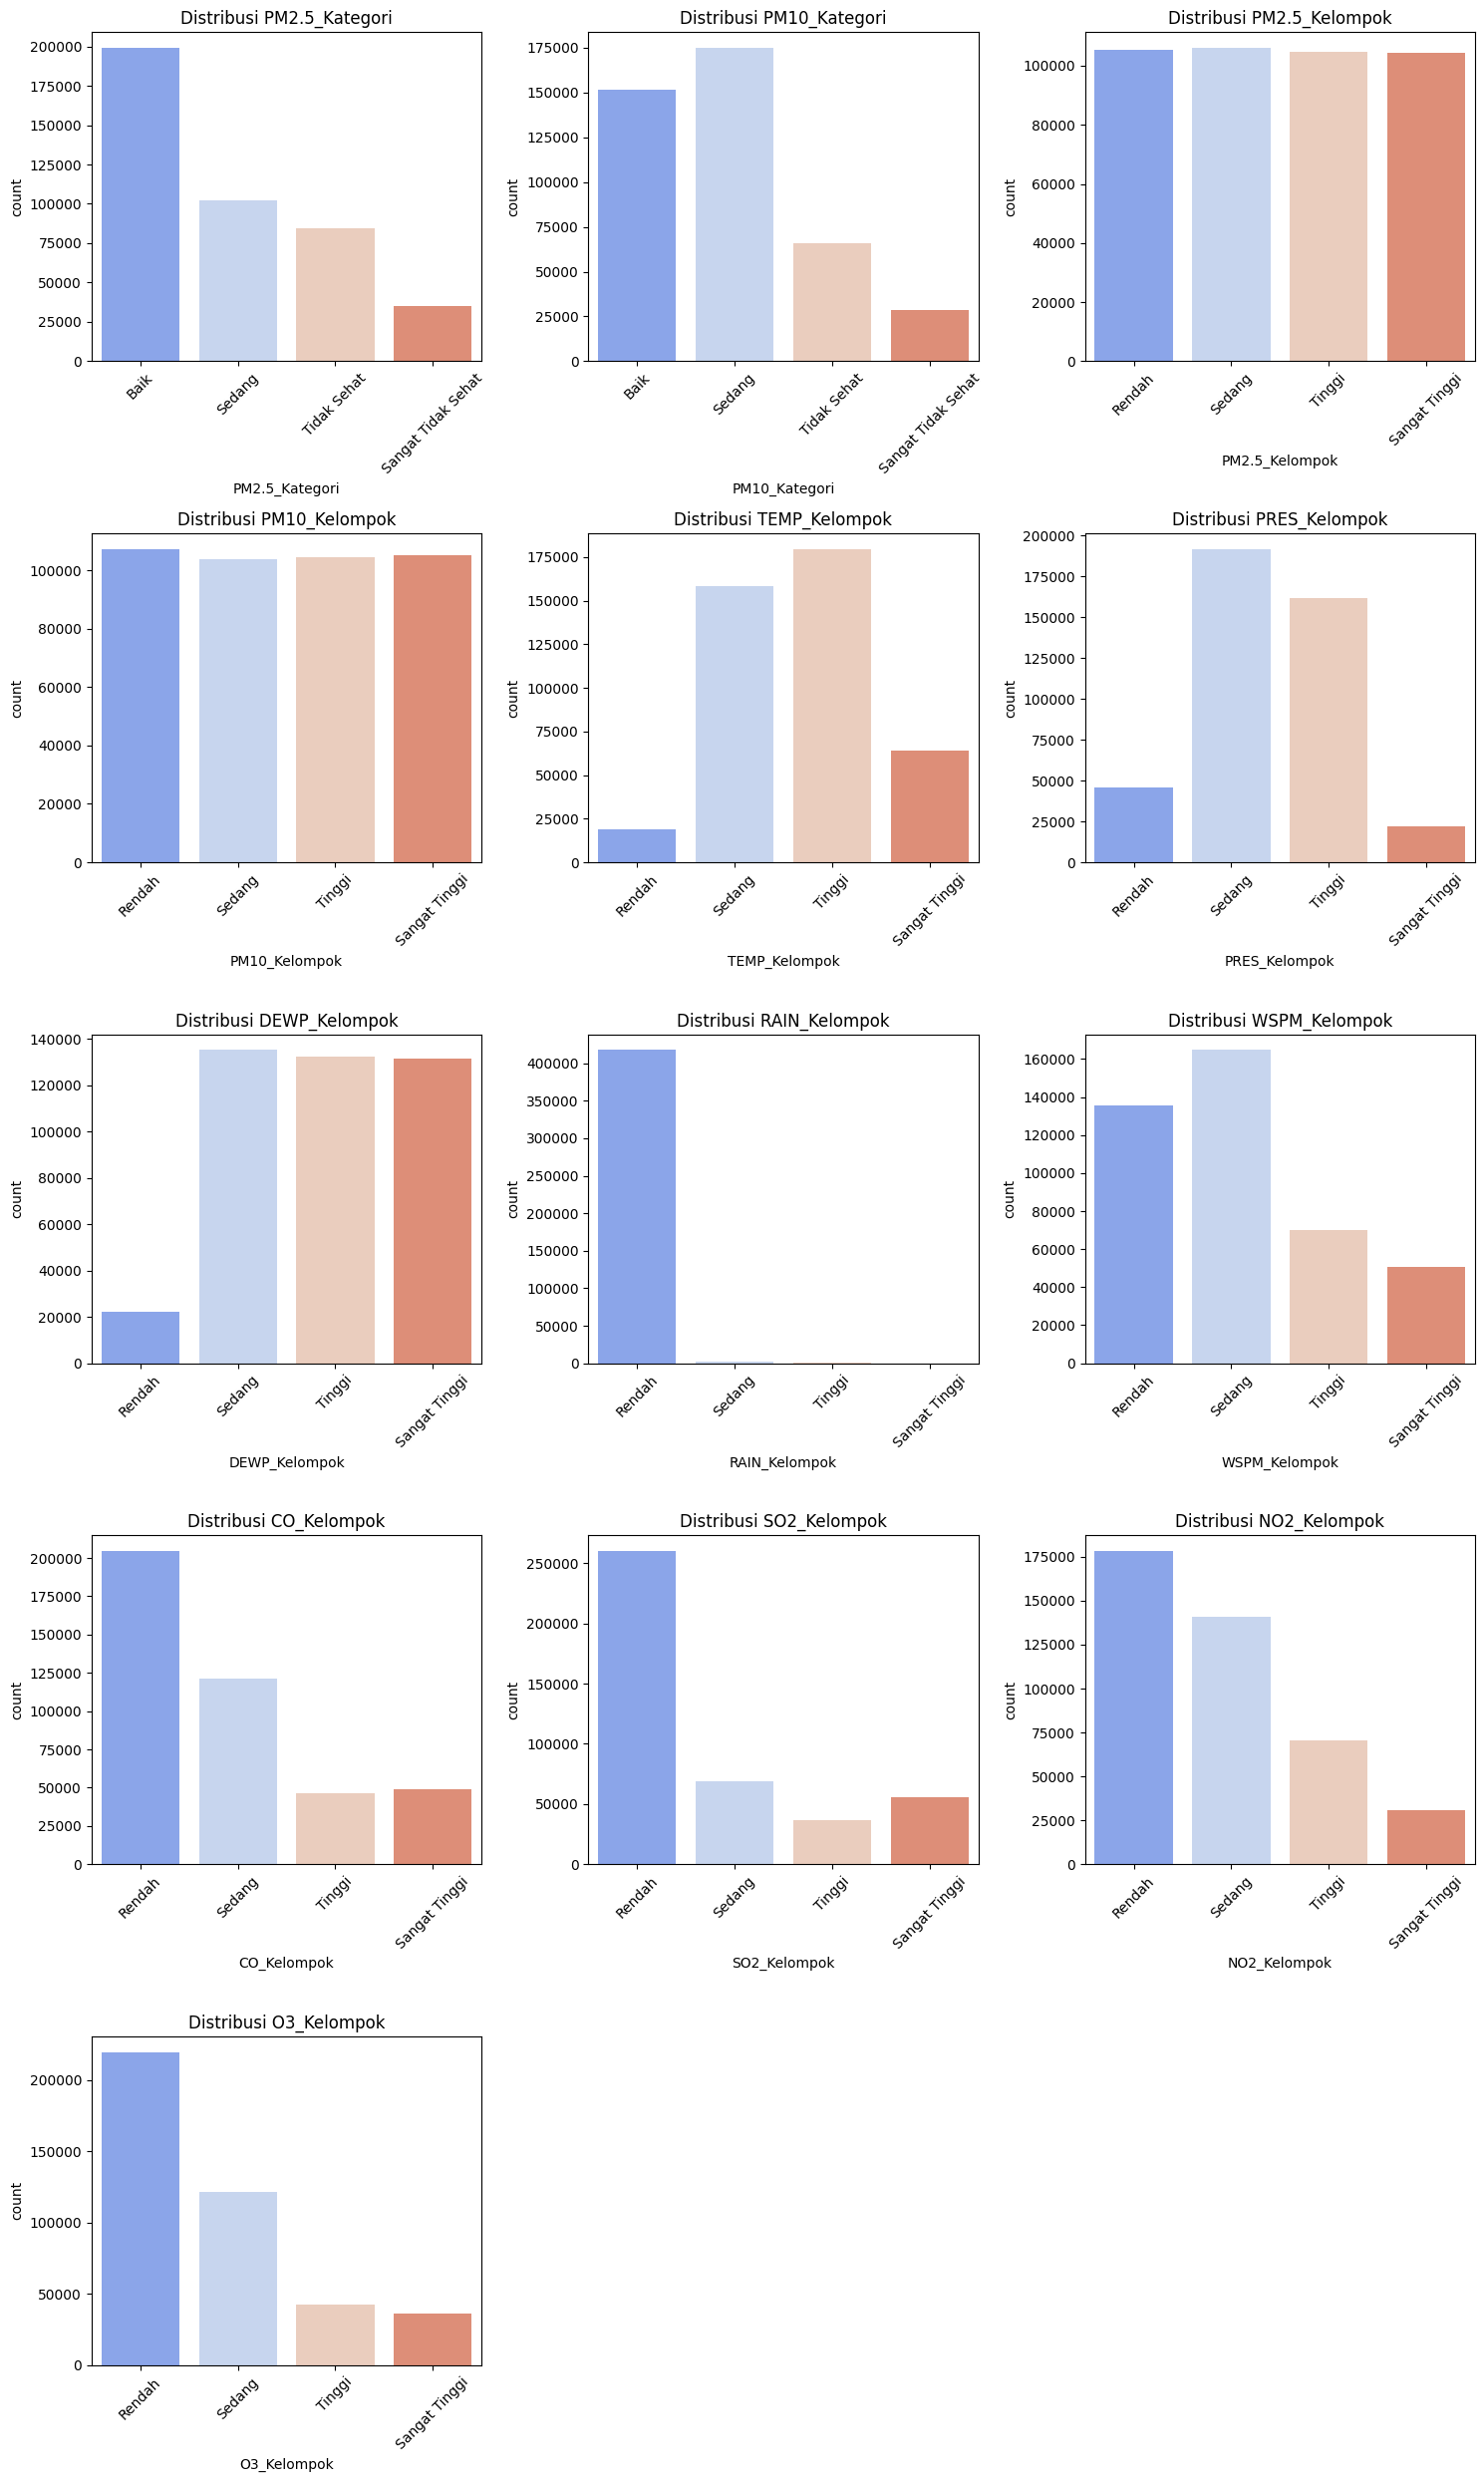

In [ ]:
def categorize_pm25(value):
    if value <= 50:
        return "Baik"
    elif value <= 100:
        return "Sedang"
    elif value <= 200:
        return "Tidak Sehat"
    elif value <= 300:
        return "Sangat Tidak Sehat"
    else:
        return "Berbahaya"

def categorize_pm10(value):
    if value <= 54:
        return "Baik"
    elif value <= 154:
        return "Sedang"
    elif value <= 254:
        return "Tidak Sehat"
    elif value <= 354:
        return "Sangat Tidak Sehat"
    else:
        return "Berbahaya"

df["PM2.5_Kategori"] = df["PM2.5"].apply(categorize_pm25)
df["PM10_Kategori"] = df["PM10"].apply(categorize_pm10)

numeric_columns = ["TEMP", "PRES", "DEWP", "RAIN", "WSPM", "CO", "SO2", "NO2", "O3"]
for col in numeric_columns:
    df[f"{col}_Kelompok"] = pd.cut(df[col], bins=4, labels=["Rendah", "Sedang", "Tinggi", "Sangat Tinggi"])

df["PM2.5_Kelompok"] = pd.qcut(df["PM2.5"], q=4, labels=["Rendah", "Sedang", "Tinggi", "Sangat Tinggi"])
df["PM10_Kelompok"] = pd.qcut(df["PM10"], q=4, labels=["Rendah", "Sedang", "Tinggi", "Sangat Tinggi"])

categorical_columns = ["PM2.5_Kategori", "PM10_Kategori", "PM2.5_Kelompok", "PM10_Kelompok"] + [f"{col}_Kelompok" for col in numeric_columns]

num_cols = 3 
num_rows = -(-len(categorical_columns) // num_cols)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 5))
axes = axes.flatten()

for i, col in enumerate(categorical_columns):
    sns.countplot(x=col, data=df, palette="coolwarm", ax=axes[i])
    axes[i].set_title(f"Distribusi {col}")
    
    # Pastikan set_ticks() dipanggil sebelum set_xticklabels()
    axes[i].set_xticks(range(len(axes[i].get_xticklabels())))
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


## Conclusion

- Conclution pertanyaan 1 : Secara keseluruhan, tren PM2.5 dan PM10 menunjukan bahwa perbaikan dari kualitas udara terjadi pada tahun 2015-2016 yang ditunjukan oleh grafik terjadinya menurunan tapi belum stabil hingga terjadi peningkatan kembali pada tahun 2017.
- Conclution pertanyaan 2 : Distribusi dari PM2.5 dan PM10 cenderung right skewed yang mengindikasikan perhatian khusus terhadap lonjakan yang ekstrim. Meskipun rata ratanya terlihat cukup bagus tapi ada ekor panjang pada distribusi yang memperlihatkan potensi terjadinya polusi tinggi.
- Conclution pertanyaan 3 : Secara keseluruhan, meskipun faktor cuaca seperti suhu atau kelembapan itu pengaruhnya dalam skala kecil, arah angin (wd) lebih menentukan karena angin dari arah tertentu itu membawa polusi yang lebih tinggi.
- Conclution pertanyaan 4 : Terdapat beberapa tingkat polusi udara dari berbagai station selama 2013-2017. Station-station yang memiliki kadar polutan yang relatif tinggi memerlukan perhatian khusus untuk menangani masalah polusi untuk menekan kadar polusinya.
- Conclution pertanyaan 5 : Meskipun perbedaan tidak terlau besar, dari data menunjukan bahwa hari libur memiliki tingkat PM2.5 sedikit lebih tinggi.
- Conclution pertanyaan 6 : Polutan cenderung lebih rendah dari pagi hingga siang hari dan mulai meningkat pada sore hingga malam hari. Dari pola ini bisa disimpulkan bahwa waktu terbaik beraktifitas diluar ruangan adalah dari pagi hingga siang.
- Conclution pertanyaan 7 : Station Dongsi dikategorikan sebagai station dengan udara paling buruk diantara station lainnya yang mengindikasikan perlunya perhatian khusus untuk menurunkan kadar polusi pada station ini.
- Conclusion pertanyaan 8 : Waktu terbaik untuk beraktifitas adalah pada pagi hari hingga siang hari, pada siang hari polusi terjadi lonjakan sedikit kemudian menurun lagi pada sore hari yang menunjukan aktifitas saat siang hingga sore itu memiliki udara yang cukup bersih kecuali malam hari yang terjadinya kenaikan drastis dari udara kotor atau polusinya.
- Conclusion pertanyaan 9 : Secara keseluruhan ada hal menarik dimana justru udara kotor paling banyak ada pada hari sabtu yang merupakan weekend, kemudian menurun hari minggu, senin, selasa hingga rabu mengalami kenaikan lagi. Dari hal ini bisa disimpulkan untuk berpergian jauh sebaikan dilakukan pada hari minggu.